In [2]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

# Read Data

In [3]:
data_train = pd.read_csv("./NSL-KDD/KDDTest+.txt")

# Information About Data

In [4]:
len(data_train)

22543

In [5]:
data_train.shape

(22543, 43)

In [6]:
data_train.head(5)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,229,10,0.00,0.00.1,1.00,1.00.1,0.04,0.06,0.00.2,255,10.1,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


# Initialize Columns(Rename each column)

In [7]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [8]:
data_train.columns = columns

# Information about Columns

In [9]:
data_train['flag'].unique()

array(['REJ', 'SF', 'RSTO', 'S0', 'RSTR', 'SH', 'S3', 'S2', 'S1',
       'RSTOS0', 'OTH'], dtype=object)

In [10]:
data_train['outcome'].unique()

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [11]:
data_train['level'].unique()

array([21, 15, 11,  7,  9, 18, 14, 20, 17,  1, 19, 12, 13,  3,  8,  0, 16,
       10,  2,  5,  6,  4], dtype=int64)

In [12]:
data_train['flag'].value_counts()

flag
SF        14875
REJ        3849
S0         2013
RSTO        773
RSTR        669
S3          249
SH           73
S1           21
S2           15
OTH           4
RSTOS0        2
Name: count, dtype: int64

In [13]:
data_train['outcome'].value_counts()

outcome
normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: count, dtype: int64

In [14]:
data_train['level'].value_counts()

level
21    10693
18     2967
20     1343
15     1176
17     1168
19      890
14      736
16      681
13      519
12      486
11      461
7       249
10      195
6       157
8       131
0       123
3       116
9       106
5       103
4       101
1        87
2        55
Name: count, dtype: int64

In [15]:
data_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [16]:
data_train.nunique()

duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
urgent                            4
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_host_login                     2
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate             

In [17]:
data_train.max()

duration                          57715
protocol_type                       udp
service                           whois
flag                                 SH
src_bytes                      62825648
dst_bytes                       1345927
land                                  1
wrong_fragment                        3
urgent                                3
hot                                 101
num_failed_logins                     4
logged_in                             1
num_compromised                     796
root_shell                            1
su_attempted                          2
num_root                            878
num_file_creations                  100
num_shells                            5
num_access_files                      4
num_outbound_cmds                     0
is_host_login                         1
is_guest_login                        1
count                               511
srv_count                           511
serror_rate                         1.0


# Data Preprocessing

In [18]:
# Check Null Values
data_train.isna().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [19]:
# Check Duplicated
data_train.duplicated().sum()

0

In [20]:
# Information about each columns
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [21]:
# Make outcome column with two unique values (normal, attack)
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

In [22]:
data_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.0,1.0,1.0,0.01,0.06,0.0,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.0,1.0,attack,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.0,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.0,0.0,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.0,0.0,0.0,1.00,0.00,1.0,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.0,0.0,attack,15


In [23]:
# Check Outliers
from scipy.stats import zscore
numeric_columns = data_train.select_dtypes(include=[np.number])
z_scores = numeric_columns.apply(zscore)
# Detect outliers
outliers = (z_scores.abs() > 3).sum()
outliers

duration                        494
src_bytes                         6
dst_bytes                        36
land                              7
wrong_fragment                  100
urgent                           10
hot                              71
num_failed_logins               478
logged_in                         0
num_compromised                  10
root_shell                       55
su_attempted                      4
num_root                          9
num_file_creations               16
num_shells                       19
num_access_files                 72
num_outbound_cmds                 0
is_host_login                    11
is_guest_login                  641
count                           876
srv_count                       738
serror_rate                    2104
srv_serror_rate                2165
rerror_rate                       0
srv_rerror_rate                   0
same_srv_rate                     0
diff_srv_rate                  1481
srv_diff_host_rate          

# More Preprocessing on the data

In [24]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df

In [25]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)
    num_cols = df_num.columns
    scaled_df = Scaling(df_num, num_cols)
    
    dataframe.drop(labels=num_cols, axis="columns", inplace=True)
    dataframe[num_cols] = scaled_df[num_cols]
    
    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1
    
    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe

In [26]:
scaled_train = preprocess(data_train)
print(data_train.shape)
print(scaled_train.shape)

(22543, 43)
(22543, 118)


# Descriptive Statistics

In [27]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
land,22543.0,0.000311,0.017619,0.000000,0.000000,0.0,0.000000,1.000000
logged_in,22543.0,0.442222,0.496661,0.000000,0.000000,0.0,1.000000,1.000000
is_host_login,22543.0,0.000488,0.022085,0.000000,0.000000,0.0,0.000000,1.000000
is_guest_login,22543.0,0.028435,0.166214,0.000000,0.000000,0.0,0.000000,1.000000
level,22543.0,18.017833,4.270409,0.000000,17.000000,20.0,21.000000,21.000000
duration,22543.0,218.868784,1407.207069,0.000000,0.000000,0.0,0.000000,57715.000000
src_bytes,22543.0,36.034534,1647.376002,-0.188153,-0.188153,0.0,0.811847,218904.508711
dst_bytes,22543.0,3.344609,35.307427,-0.076539,-0.076539,0.0,0.923461,2239.402662
wrong_fragment,22543.0,0.008428,0.142602,0.000000,0.000000,0.0,0.000000,3.000000
urgent,22543.0,0.000710,0.036474,0.000000,0.000000,0.0,0.000000,3.000000


In [28]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,land,logged_in,is_host_login,is_guest_login,level,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,0.000311,0.442222,0.000488,0.028435,18.017833,218.868784,36.034534,3.344609,0.008428,0.000710,0.105399,0.021648,0.119904,0.002440,0.000266,0.114670,0.008739,0.001153,0.003549,0.000000,0.582145,1.675021,0.102928,0.103640,0.953717,3.359212,-0.346166,1.567922,0.098115,-0.456219,-0.113515,-0.334681,1.342353,4.408893,1.963936,0.097818,0.099430,0.648197,1.333227
std,0.017619,0.496661,0.022085,0.166214,4.270409,1407.207069,1647.376002,35.307427,0.142602,0.036474,0.928448,0.150331,7.269758,0.049335,0.021061,8.041792,0.676857,0.048015,0.067831,0.000000,1.053592,5.937626,0.295373,0.298337,1.664384,5.945614,0.549972,4.319055,0.253550,0.701768,0.465763,0.468475,3.678694,10.209126,8.539568,0.273144,0.281872,1.075566,2.357945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.188153,-0.076539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.065574,-0.400000,0.000000,0.000000,0.000000,0.000000,-1.333333,0.000000,0.000000,-1.902985,-0.700000,-0.989247,-0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,-0.188153,-0.076539,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.057377,-0.333333,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-0.637500,-0.913978,-0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,21.000000,0.000000,0.811847,0.923461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.942623,0.666667,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.362500,0.086022,0.833333,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,21.000000,57715.000000,218904.508711,2239.402662,3.000000,3.000000,101.000000,4.000000,796.000000,1.000000,2.000000,878.000000,100.000000,5.000000,4.000000,0.000000,4.122951,33.666667,1.000000,1.000000,4.000000,14.285714,0.000000,16.666667,1.000000,0.000000,0.362500,0.086022,16.500000,33.333333,100.000000,1.000000,1.000000,2.777778,5.882353


# Visualization

Distribution Analysis

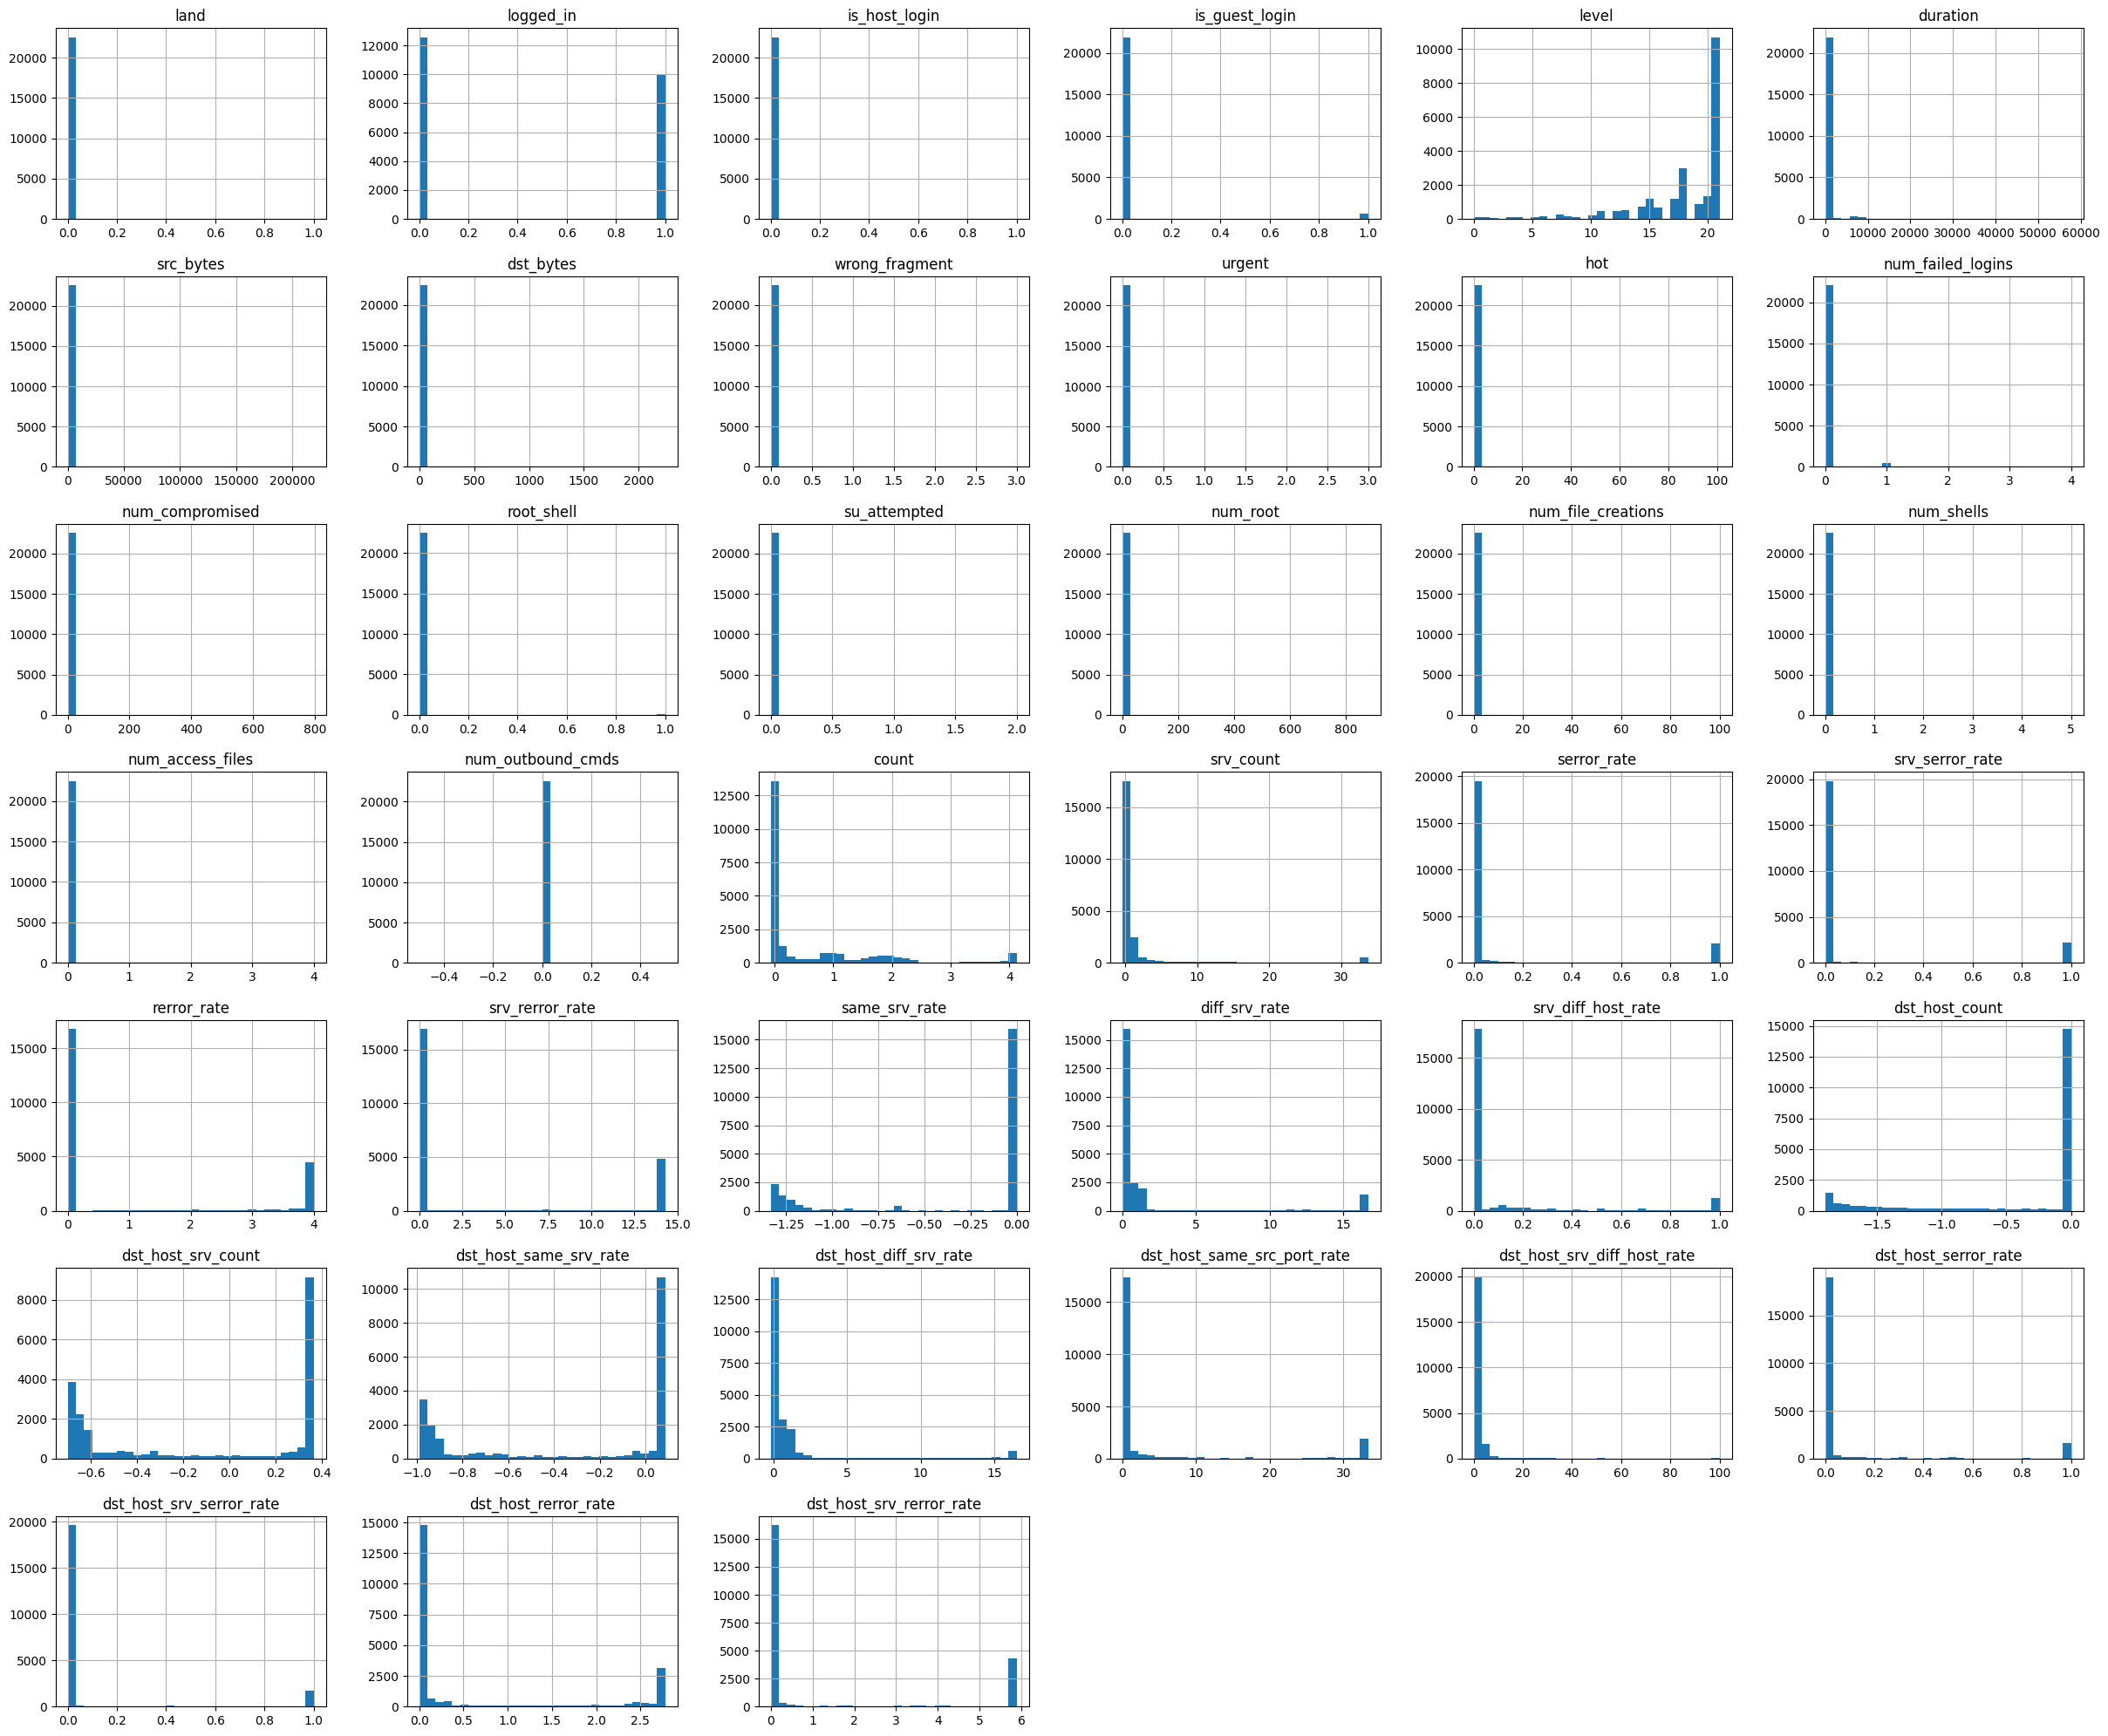

In [29]:
# Histogram
data_train.hist(bins=30, figsize=(30, 25));
plt.show();

<Figure size 2000x4000 with 0 Axes>

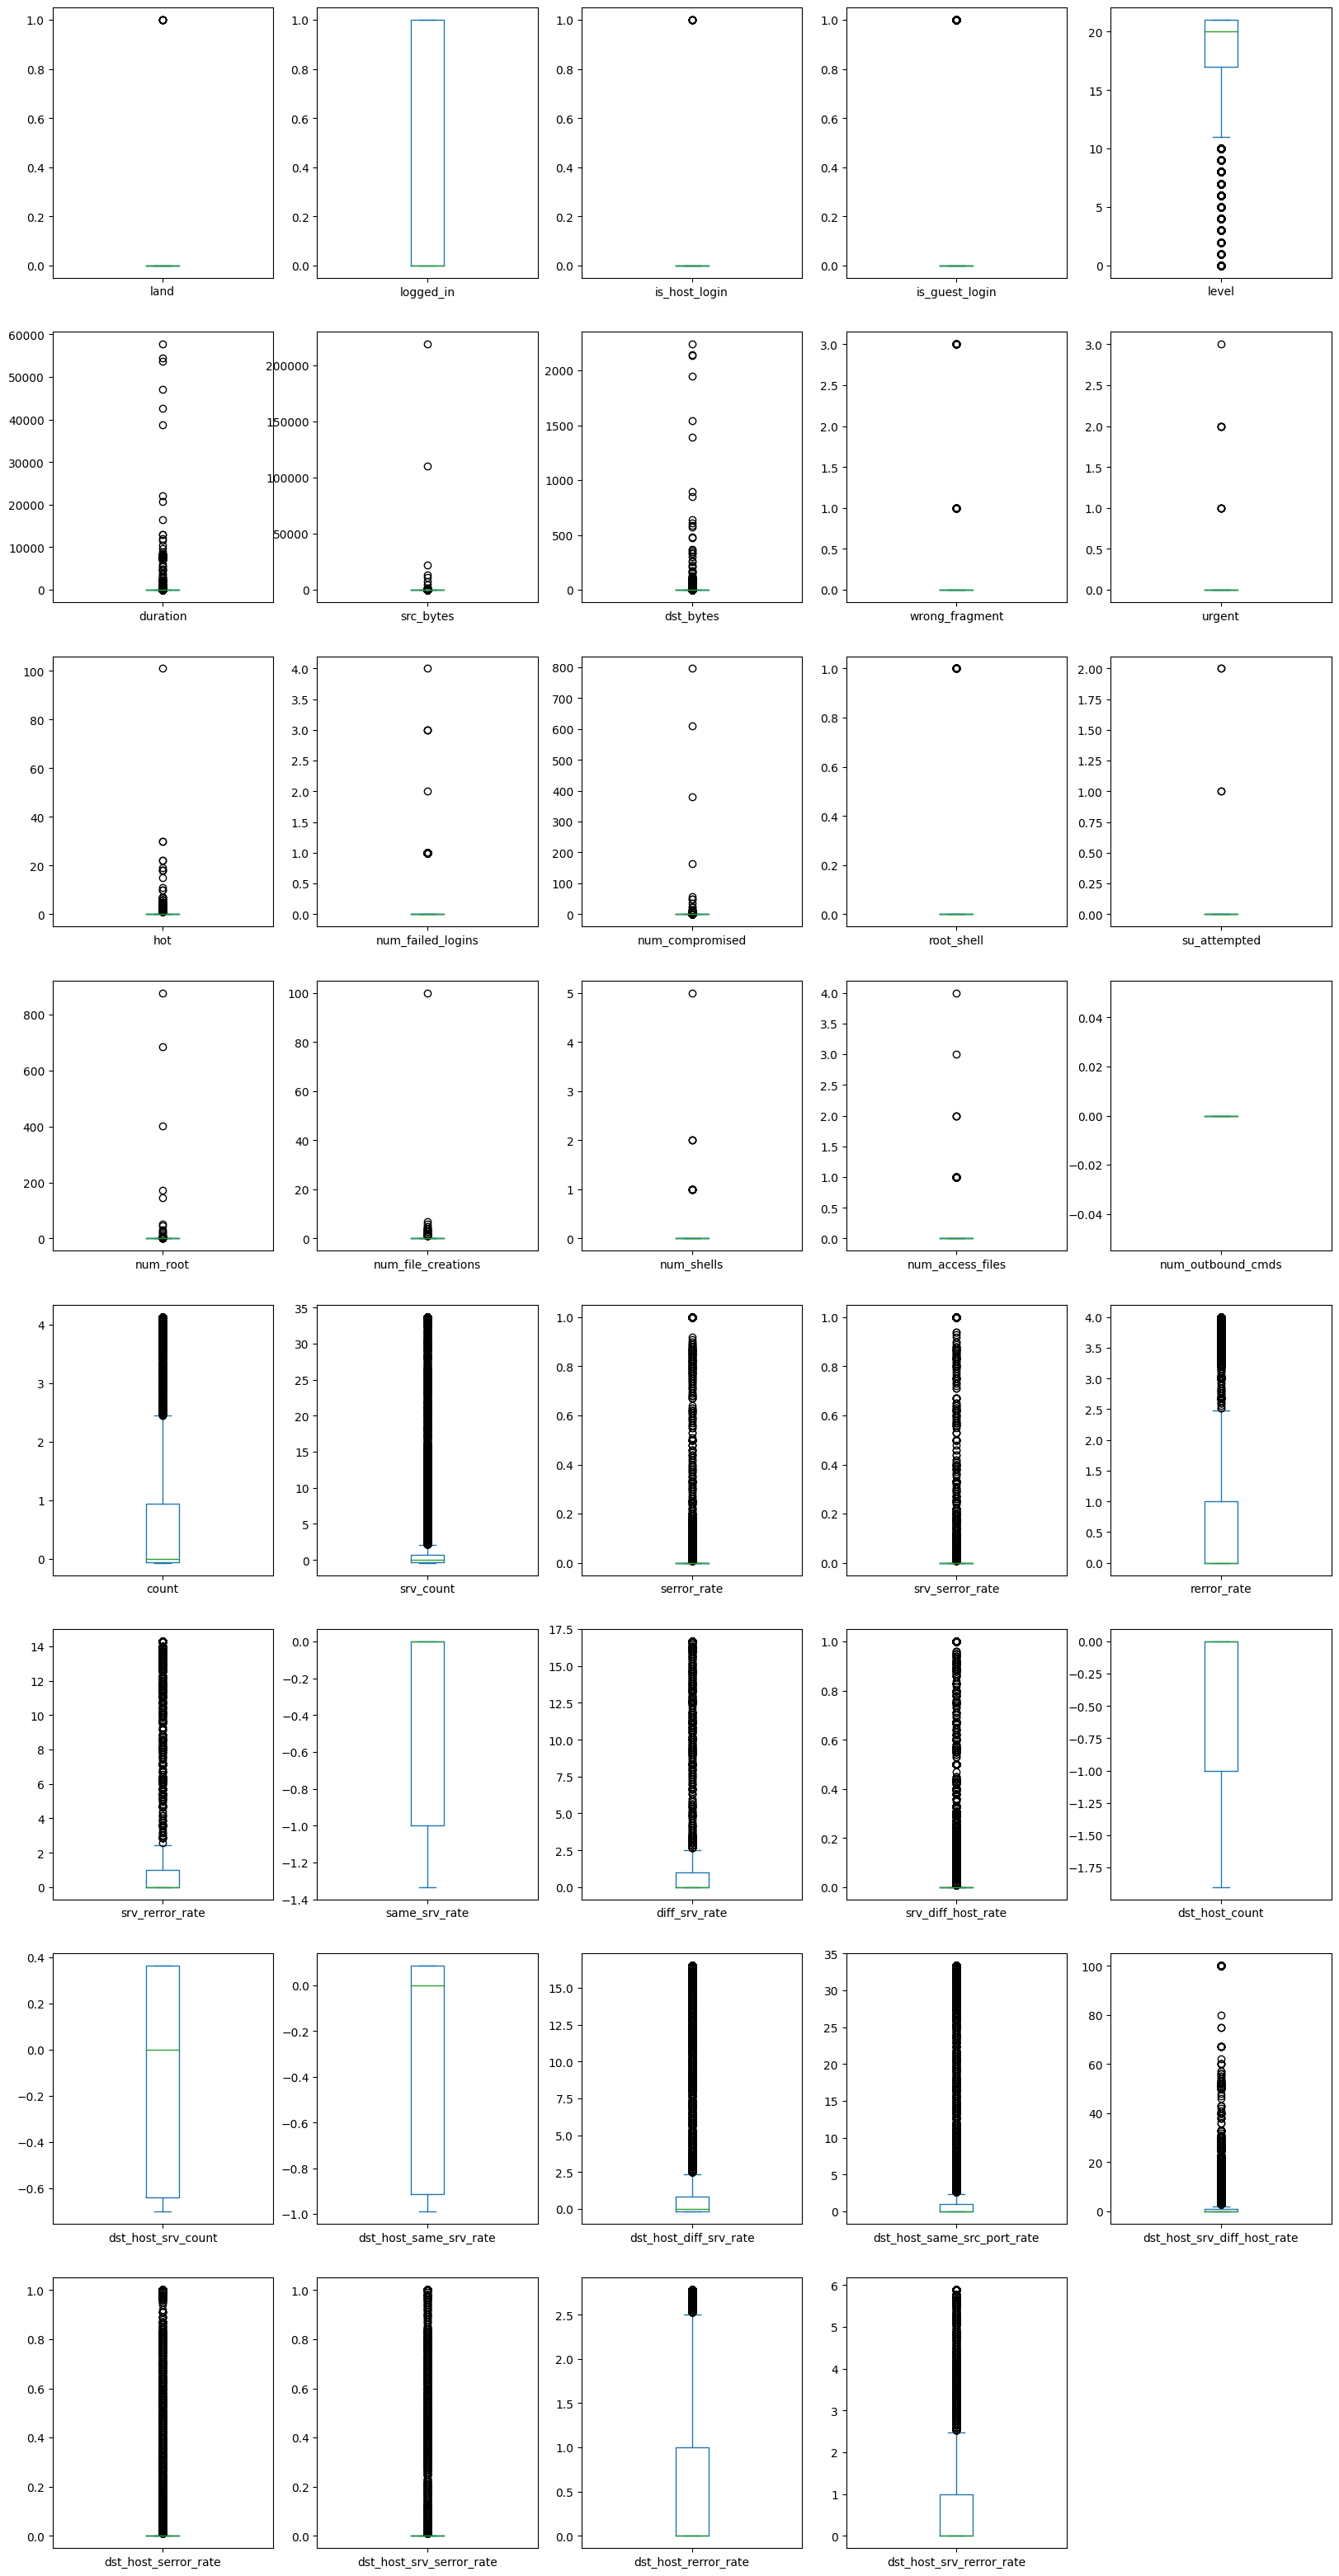

In [30]:
plt.figure(figsize=(20, 40));
data_train.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40));
plt.show();

In [31]:
# Bar Chart Graph
def bar_graph(feature):
    data_train[feature].value_counts().plot(kind="bar")

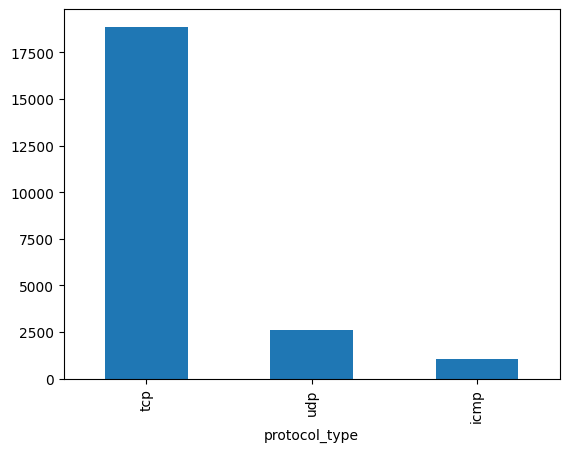

In [32]:
bar_graph('protocol_type')

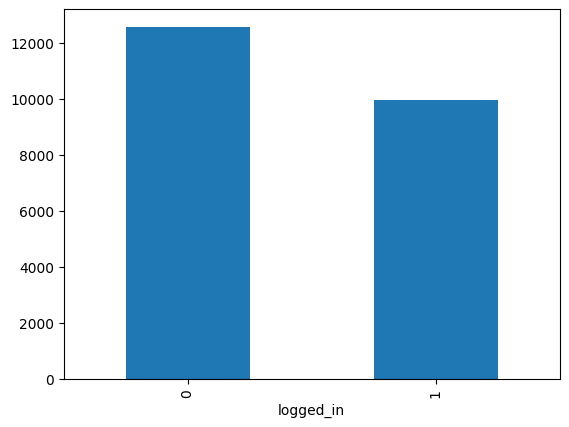

In [33]:
bar_graph('logged_in')
# logged_in (1 if successfully logged in; 0 otherwise): We notice that just 80000 packets are successfully logged in.

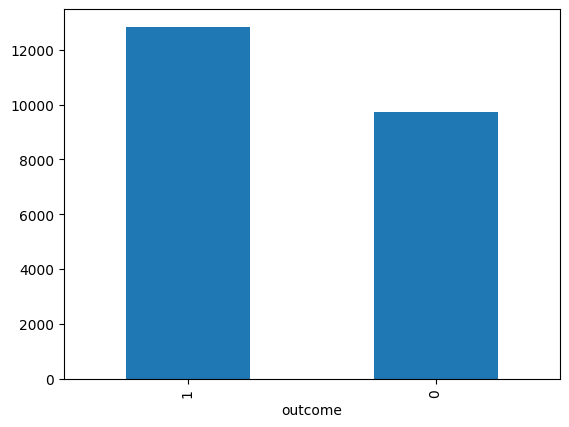

In [34]:
bar_graph('outcome')

In [35]:
# Pie Chart Graph 
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

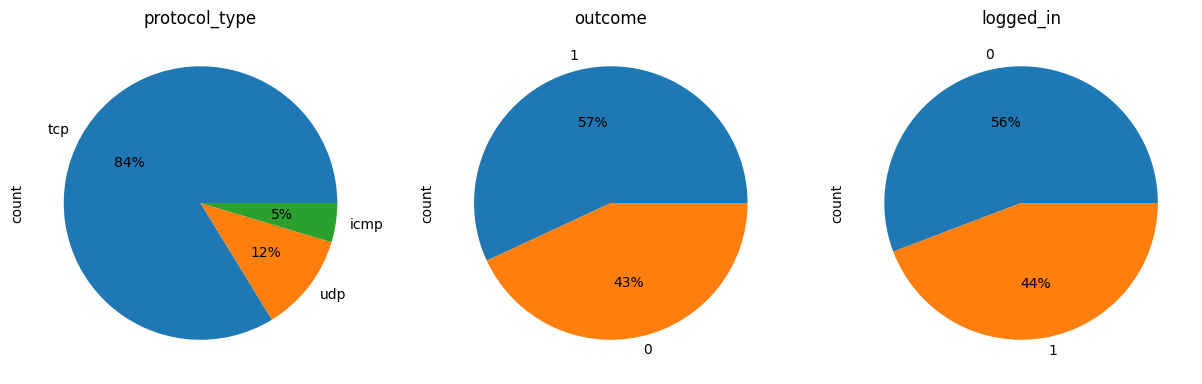

In [36]:
pie_plot(data_train, ['protocol_type', 'outcome', 'logged_in'], 1, 3)

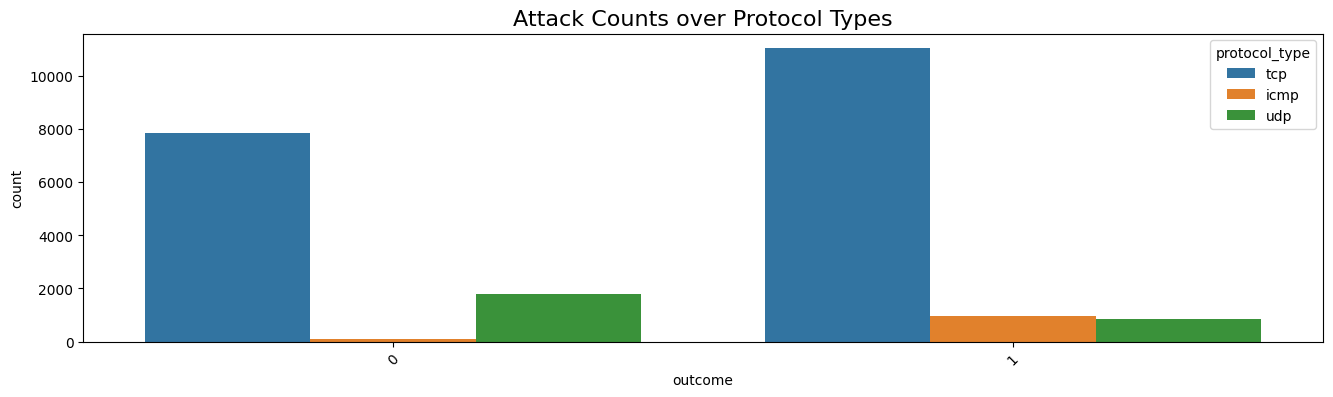

In [37]:
plt.figure(figsize=(16,4))
sns.countplot(x='outcome',data=data_train,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

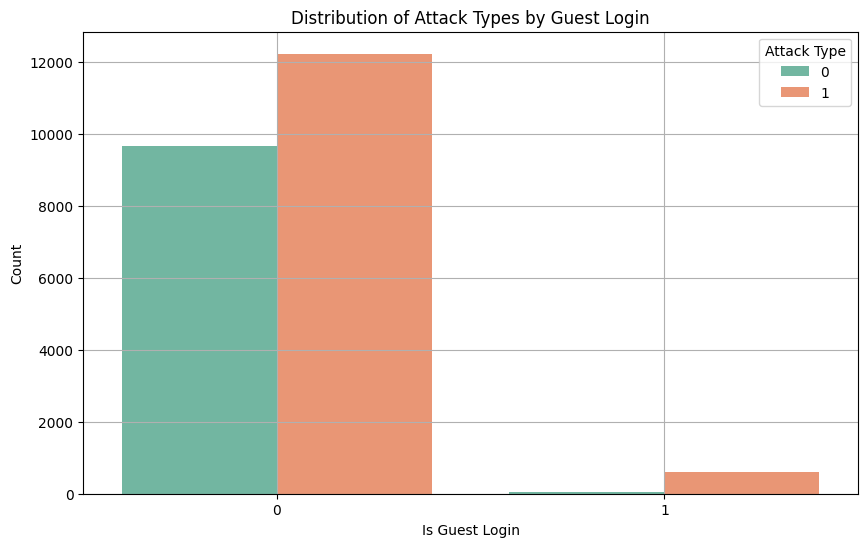

In [38]:
# Distribution of Attack Types by Guest Login
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='outcome', data=data_train, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

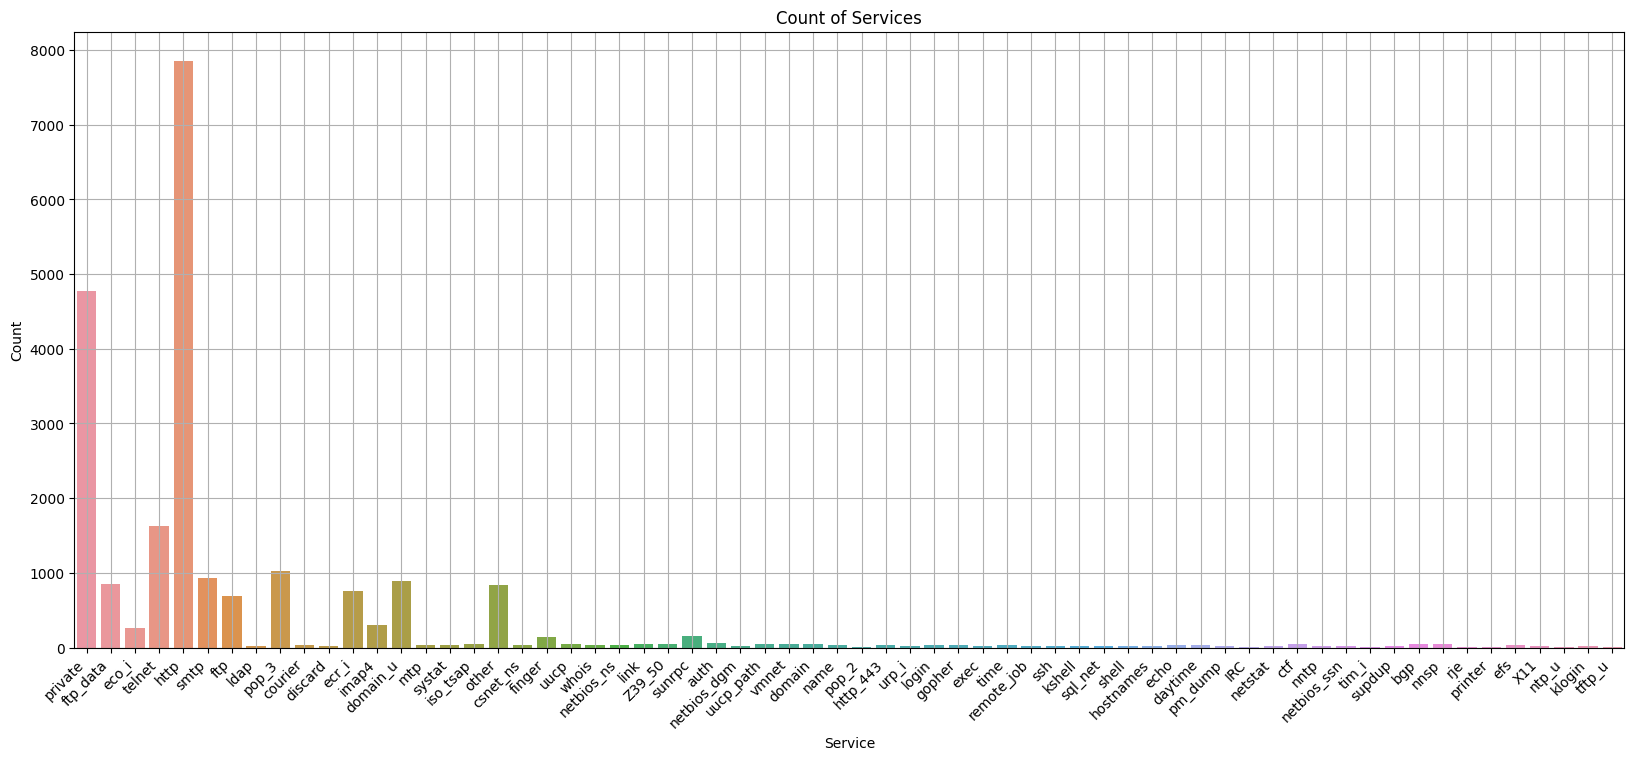

In [39]:
# Service used general
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=data_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

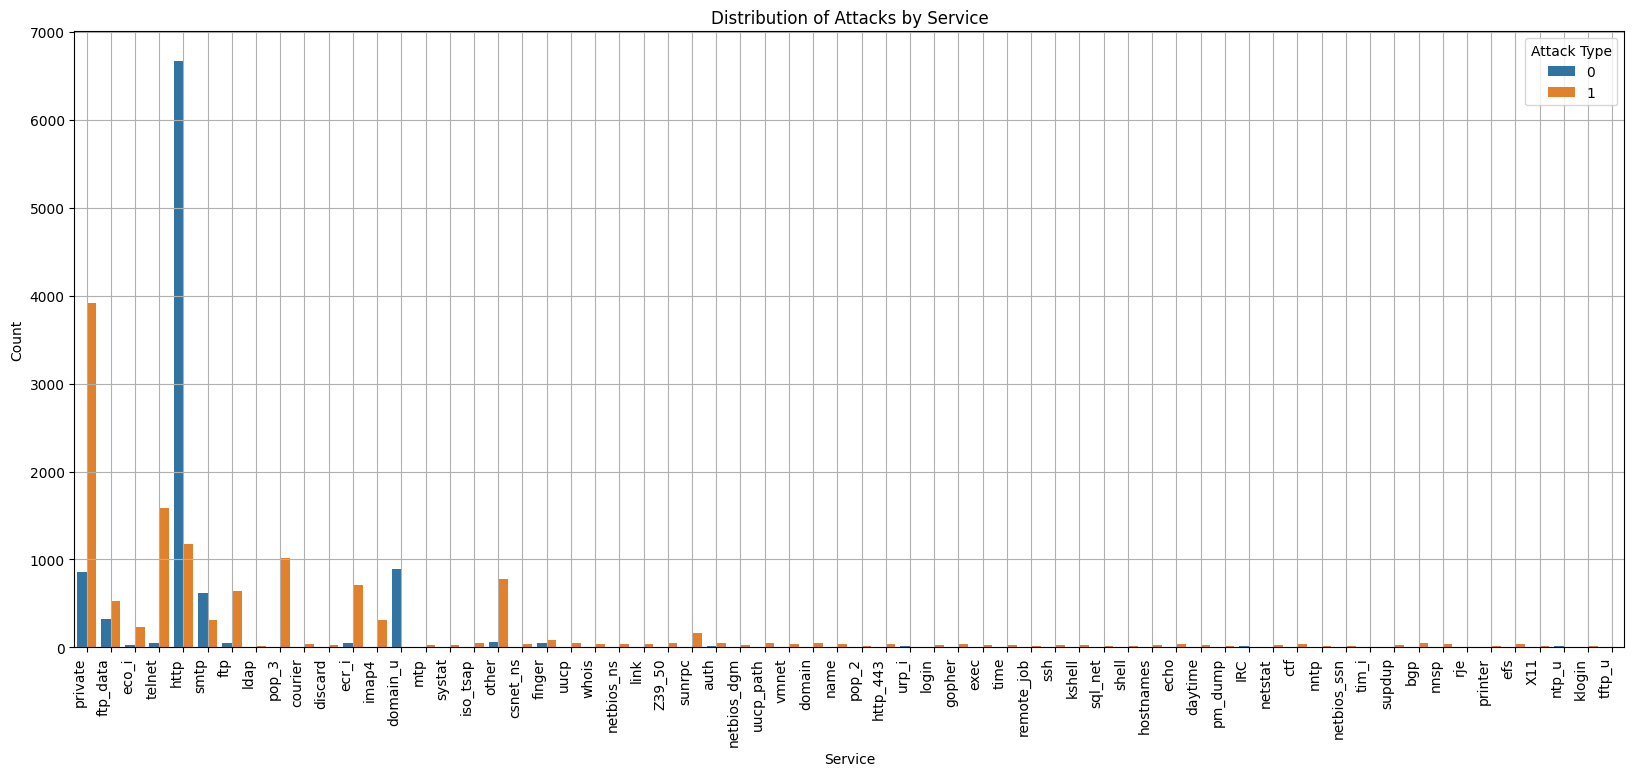

In [40]:
# Service used effect on attacks
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='outcome', data=data_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

# Principal Component Analysis

In [41]:
x = scaled_train.drop('outcome' , axis = 1).values
y = scaled_train['outcome'].values

pca = PCA(n_components=20)
pca = pca.fit(x)
x_reduced = pca.transform(x)
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))
print(x.shape)
print(x_reduced.shape)

Number of original features is 117 and of reduced features is 20
(22543, 117)
(22543, 20)


Information about columns selected by PCA

In [42]:
# Get the loading matrix
loading_matrix = pca.components_

# Create a DataFrame for better visualization
features = scaled_train.drop('outcome', axis=1).columns
loading_df = pd.DataFrame(loading_matrix.T, index=features, columns=[f'PC{i+1}' for i in range(loading_matrix.shape[0])])

# Sum the absolute values of the loadings for each feature across all principal components
loading_sums = loading_df.abs().sum(axis=1)

# Sort the features by their aggregated influence and select the top 20
top_20_features = loading_sums.sort_values(ascending=False).head(20)

print("Top 20 contributing features across all principal components:")
print(top_20_features)

Top 20 contributing features across all principal components:
srv_count                      2.539867
dst_host_srv_rerror_rate       2.497075
srv_rerror_rate                2.449252
dst_host_count                 2.325716
diff_srv_rate                  2.272593
dst_host_rerror_rate           2.243205
count                          2.230131
dst_host_diff_srv_rate         2.228042
dst_host_same_src_port_rate    2.140870
level                          1.985683
num_compromised                1.967499
num_root                       1.926860
num_file_creations             1.916598
dst_host_srv_diff_host_rate    1.898639
hot                            1.736969
rerror_rate                    1.535739
service_http                   1.459831
logged_in                      1.306619
flag_SF                        1.206068
dst_host_srv_count             1.113861
dtype: float64


# Data Splitting

In [43]:
y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

# Classification Method

In [44]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))
    
    train_precision = metrics.precision_score(y_train, model.predict(X_train))
    test_precision = metrics.precision_score(y_test, model.predict(X_test))
    
    train_recall = metrics.recall_score(y_train, model.predict(X_train))
    test_recall = metrics.recall_score(y_test, model.predict(X_test))
    
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))
    
    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])

    fig, ax = plt.subplots(figsize=(10,10))
    ax.grid(False)
    cm_display.plot(ax=ax)

# Classification outcome column (Using Original Columns)

Note: X ==> All Columns except(outcome, level)  Y ==> outcome Column

Logistic Regression

Training Accuracy Logistic Regression 87.54020184096706  Test Accuracy Logistic Regression 87.0703038367709
Training Precesion Logistic Regression 94.00571931368236  Test Precesion Logistic Regression 94.09171075837742
Training Recall Logistic Regression 83.39350180505414  Test Recall Logistic Regression 82.61711188540457


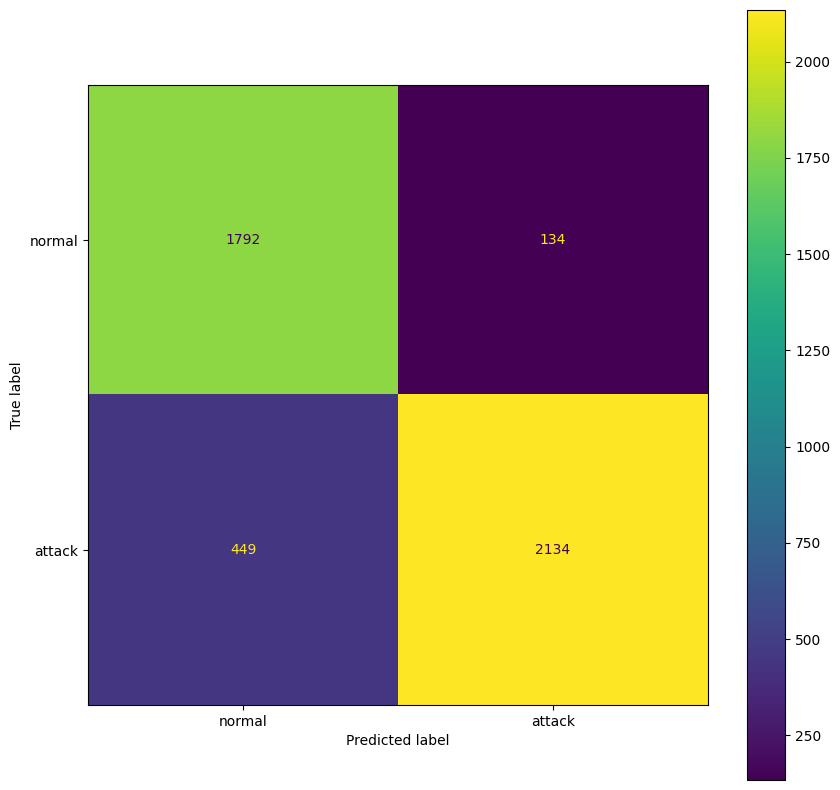

In [45]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

k-nearest neighbors

Training Accuracy KNeighborsClassifier 99.37340578906509  Test Accuracy KNeighborsClassifier 99.17941893989799
Training Precesion KNeighborsClassifier 99.3380062305296  Test Precesion KNeighborsClassifier 99.41770186335404
Training Recall KNeighborsClassifier 99.56093277392917  Test Recall KNeighborsClassifier 99.1482771970577


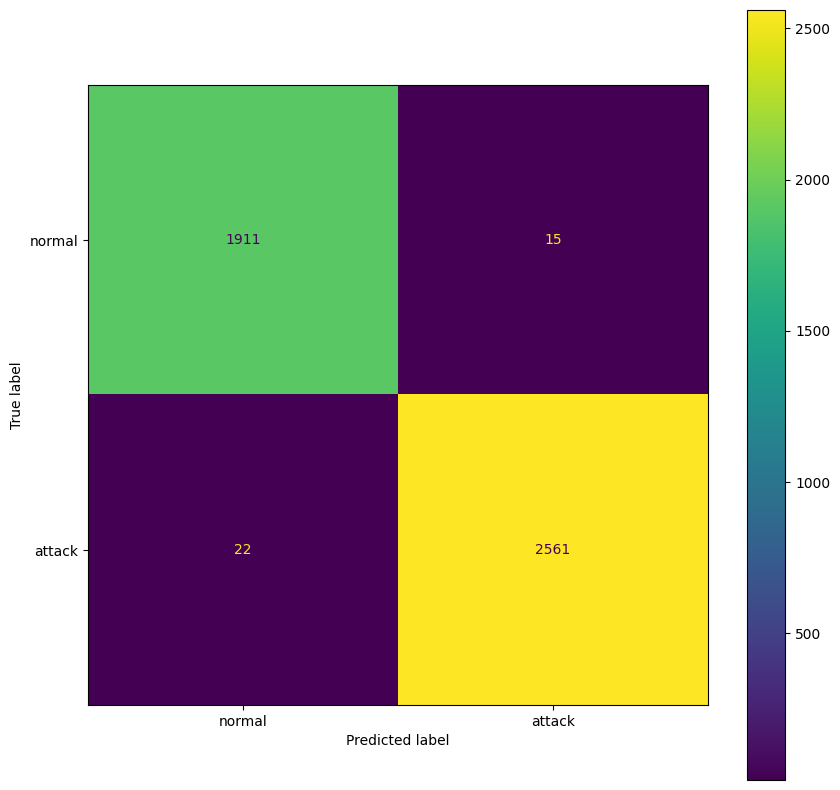

In [46]:
knn = KNeighborsClassifier().fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

Naive Bayes

Training Accuracy Naiive Bayes 90.8783409116114  Test Accuracy Naiive Bayes 91.3284542027057
Training Precesion Naiive Bayes 96.20837808807734  Test Precesion Naiive Bayes 96.16680707666386
Training Recall Naiive Bayes 87.39389208703288  Test Recall Naiive Bayes 88.3855981416957


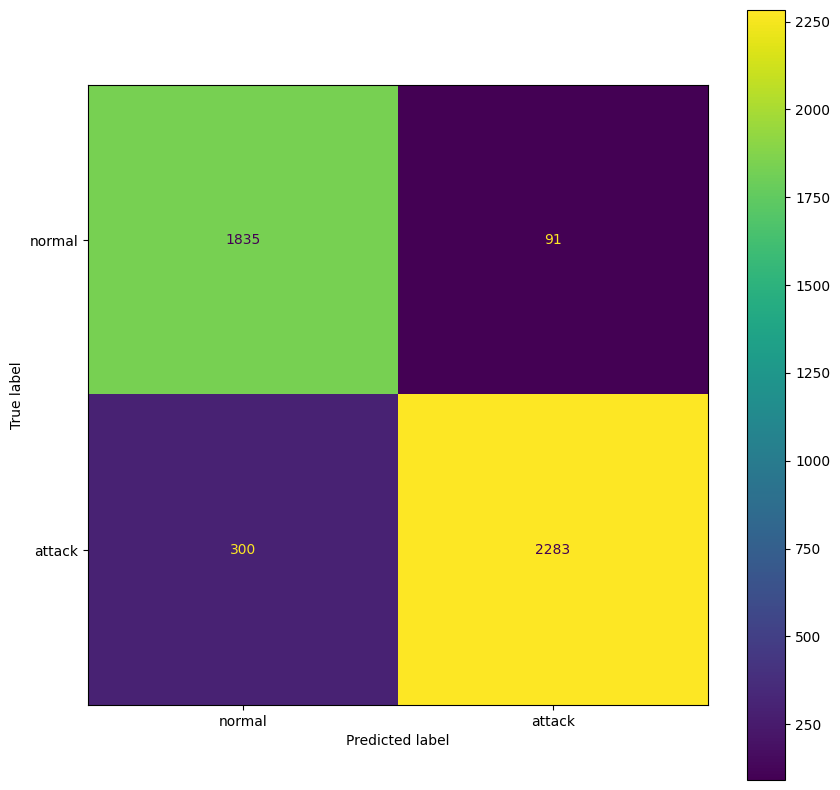

In [47]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "Naiive Bayes", x_train, x_test, y_train, y_test)

Support Vector Machines

Training Accuracy Linear SVC 96.58977486969059  Test Accuracy Linear SVC 96.76203149257042
Training Precesion Linear SVC 96.21066768994628  Test Precesion Linear SVC 96.20781190747061
Training Recall Linear SVC 97.85344911698702  Test Recall Linear SVC 98.21912504839334


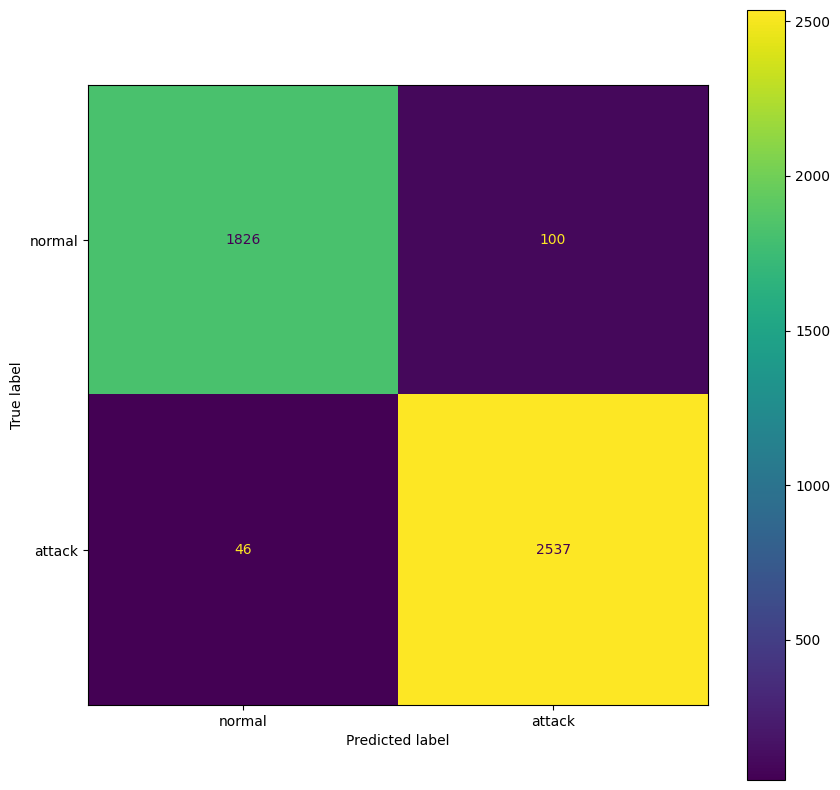

In [48]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC", x_train, x_test, y_train, y_test)

Decision Tree

Training Accuracy Decision Tree 100.0  Test Accuracy Decision Tree 99.77822133510756
Training Precesion Decision Tree 100.0  Test Precesion Decision Tree 99.88367584335013
Training Recall Decision Tree 100.0  Test Recall Decision Tree 99.7289972899729


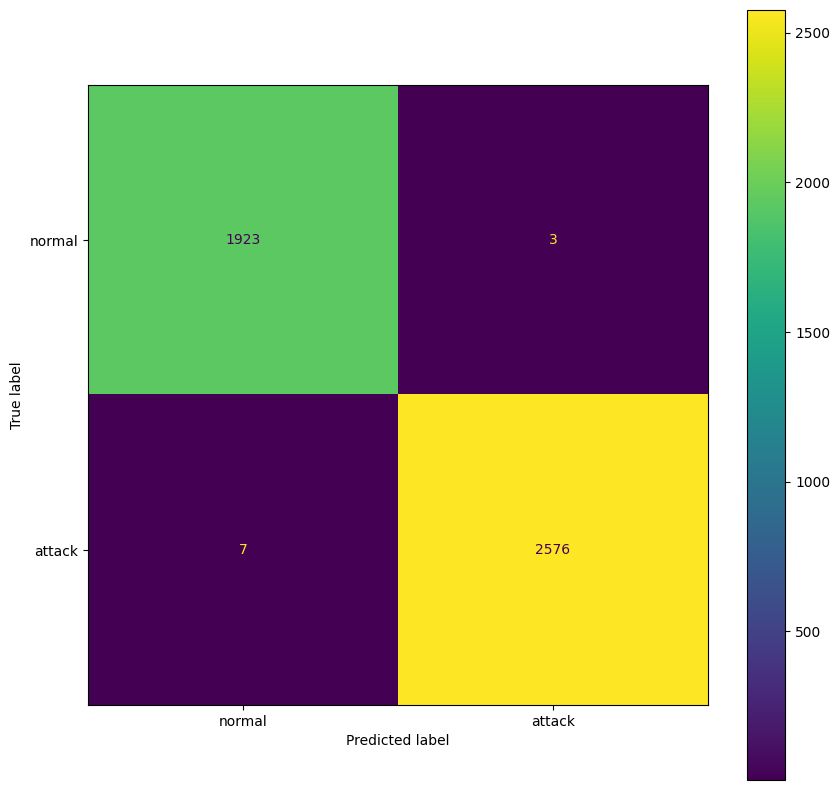

In [49]:
dt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(dt, "Decision Tree", x_train, x_test, y_train, y_test)

Check Overfitting and Handle it

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 40, 'criterion': 'gini'}
Training Accuracy Decision Tree with Best Params 99.95009426638572  Test Accuracy Decision Tree with Best Params 99.68950986915058
Training Precesion Decision Tree with Best Params 99.9707202810853  Test Precesion Decision Tree with Best Params 99.84478075281335
Training Recall Decision Tree with Best Params 99.94145770319055  Test Recall Decision Tree with Best Params 99.61285327138985


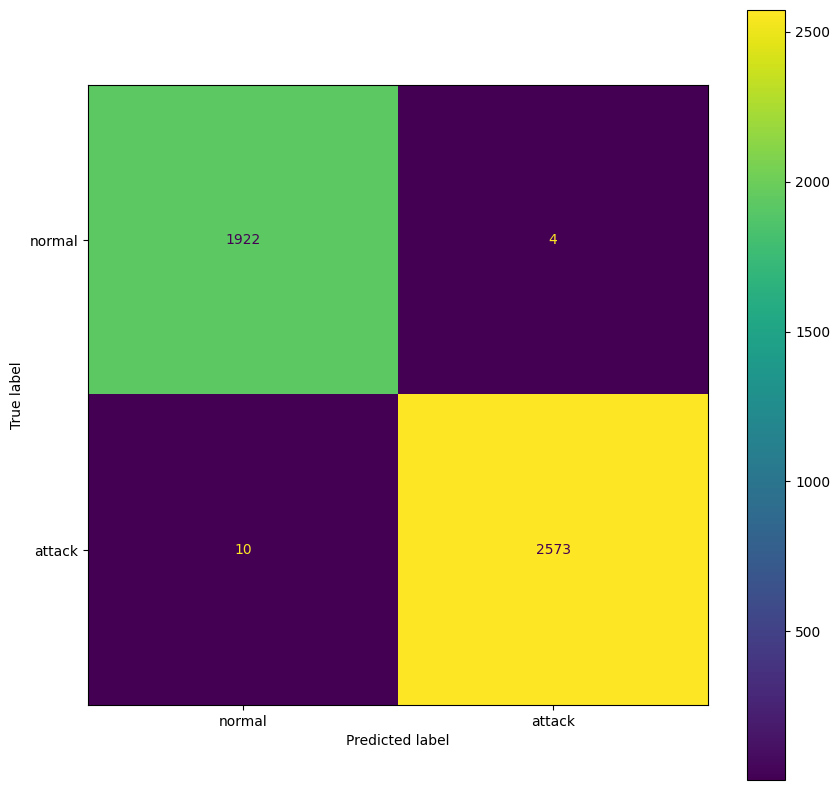

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter grid
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

# Fit the random search model
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Decision Tree with the best parameters
dt_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_best.fit(x_train, y_train)

evaluate_classification(dt_best, "Decision Tree with Best Params", x_train, x_test, y_train, y_test)


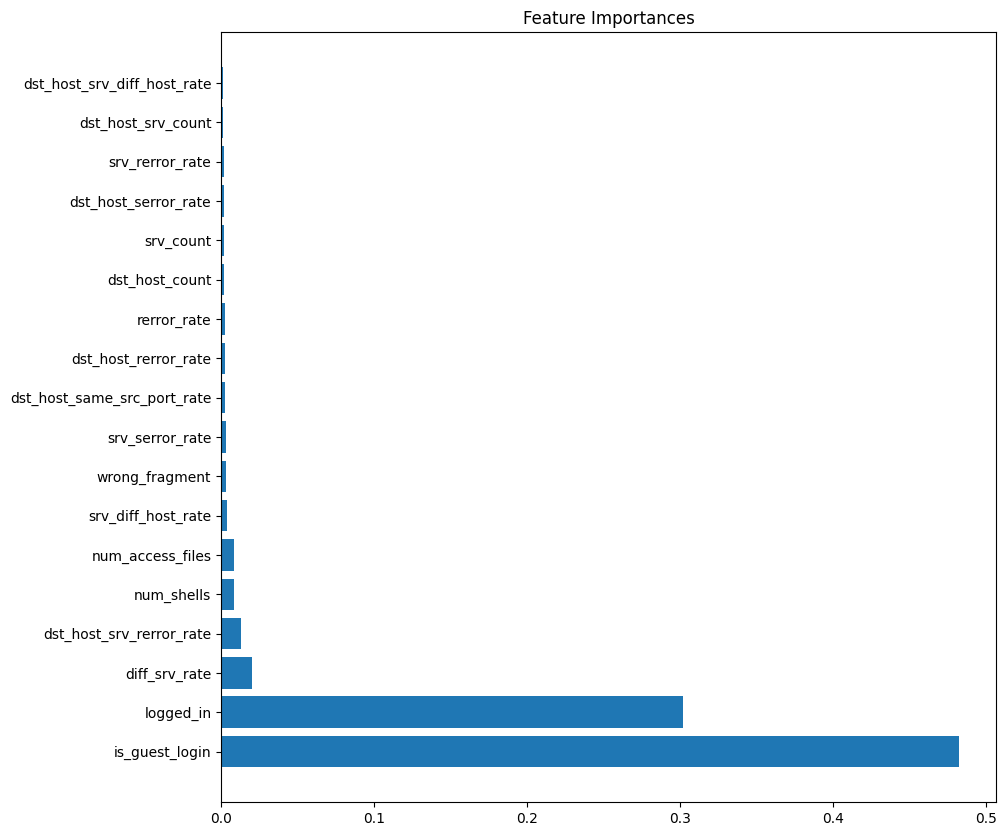

In [51]:
import matplotlib.pyplot as plt
from sklearn.exceptions import NotFittedError

# Function to plot feature importances
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    
    plt.figure(figsize=(10, 10))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('Feature Importances')
    plt.show()

# Features names
features_names = data_train.drop('outcome', axis=1).columns

# Ensure the model is fitted
try:
    # Use the fitted decision tree model dt_best
    f_importances(abs(dt_best.feature_importances_), features_names, top=18)
except NotFittedError as e:
    print(f"Model is not fitted: {e}")

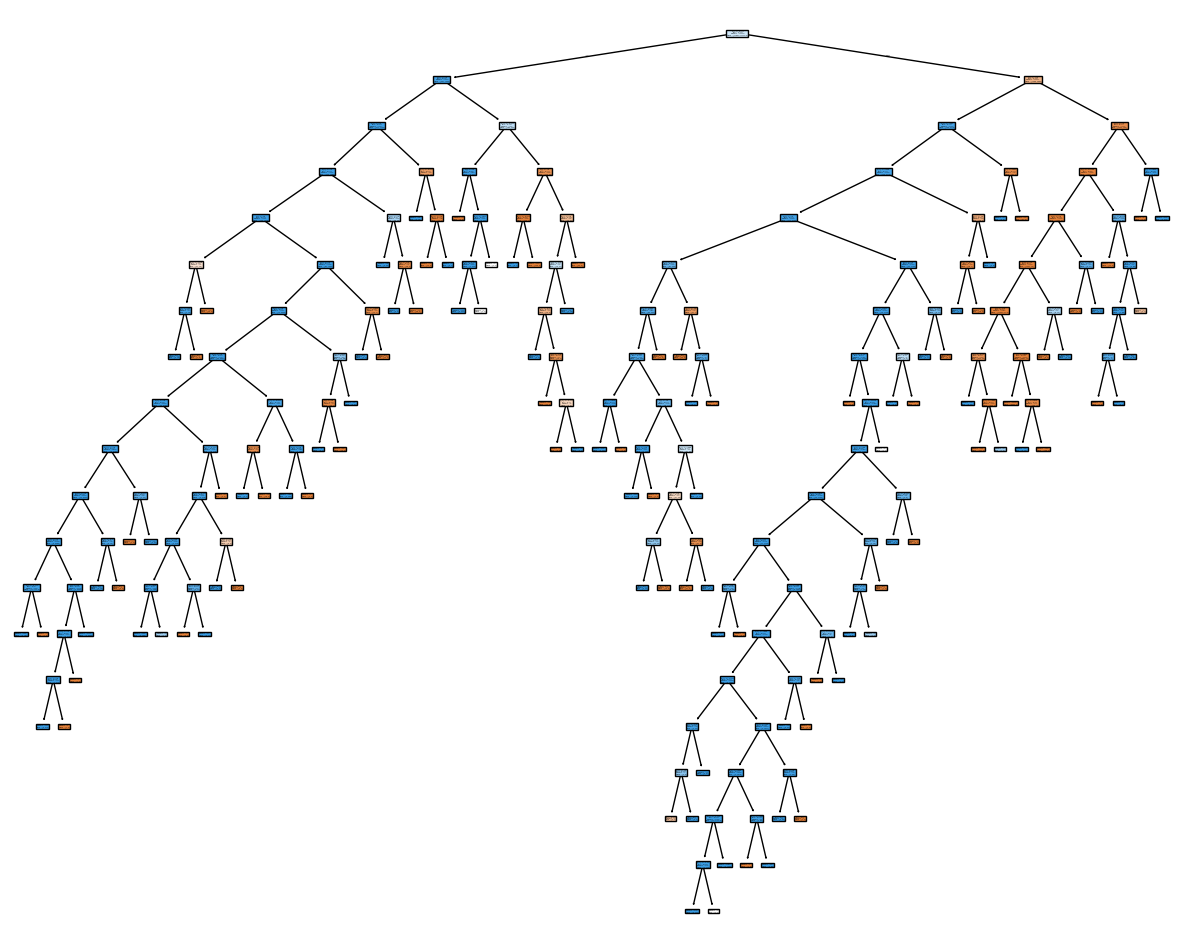

In [52]:
from sklearn.tree import plot_tree
# Plot the fitted decision tree using dt_best
fig = plt.figure(figsize=(15, 12))
plot_tree(dt_best, filled=True)
plt.show()

Random forest

Training Accuracy Random Forest 100.0  Test Accuracy Random Forest 99.77822133510756
Training Precesion Random Forest 100.0  Test Precesion Random Forest 99.84502130956994
Training Recall Random Forest 100.0  Test Recall Random Forest 99.76771196283391


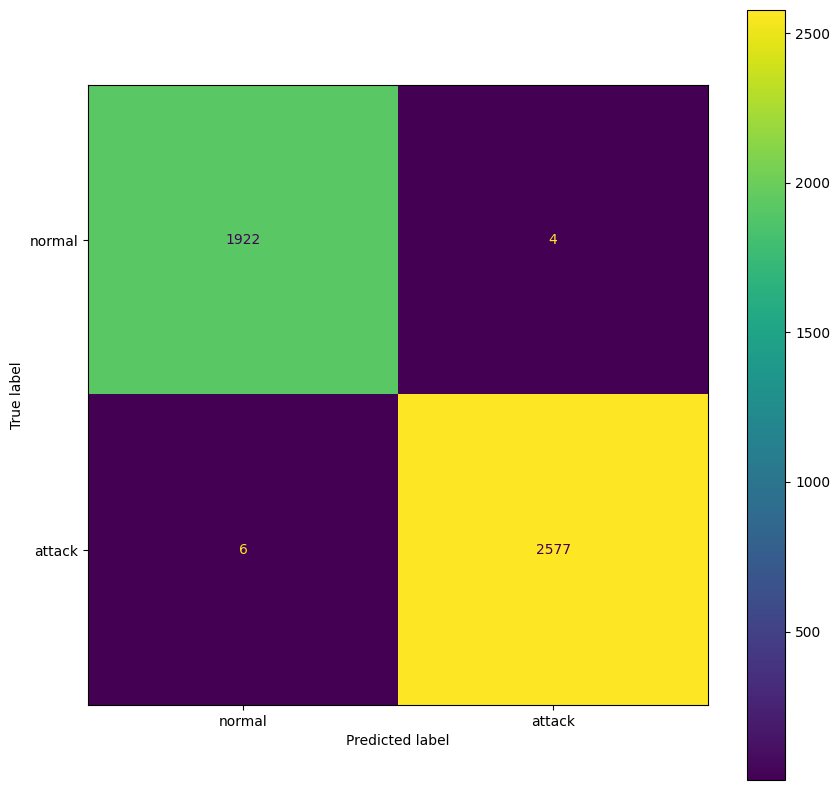

In [53]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "Random Forest", x_train, x_test, y_train, y_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}
Training Accuracy Random Forest with Best Params 100.0  Test Accuracy Random Forest with Best Params 99.77822133510756
Training Precesion Random Forest with Best Params 100.0  Test Precesion Random Forest with Best Params 99.84502130956994
Training Recall Random Forest with Best Params 100.0  Test Recall Random Forest with Best Params 99.76771196283391


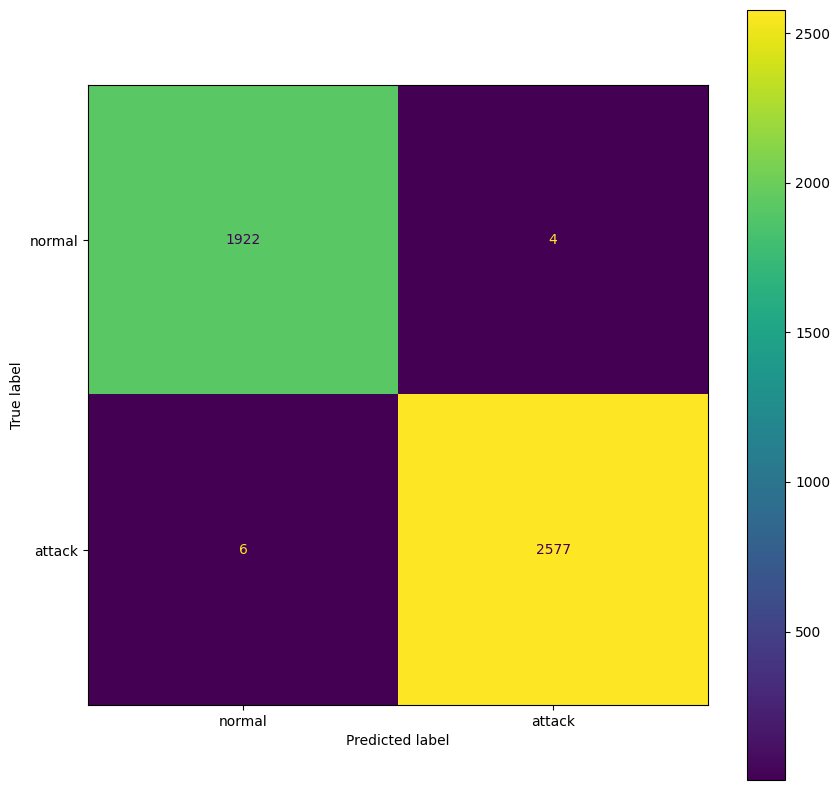

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the randomized search model
random_search.fit(x_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Random Forest with the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(x_train, y_train)

# Evaluate the tuned model
evaluate_classification(rf_best, "Random Forest with Best Params", x_train, x_test, y_train, y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters (Adjusted): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50}
Training Accuracy Random Forest with Best Params (Adjusted) 99.88909836974604  Test Accuracy Random Forest with Best Params (Adjusted) 99.77822133510756
Training Precesion Random Forest with Best Params (Adjusted) 99.844069778774  Test Precesion Random Forest with Best Params (Adjusted) 99.7678916827853
Training Recall Random Forest with Best Params (Adjusted) 99.96097180212703  Test Recall Random Forest with Best Params (Adjusted) 99.84514130855594


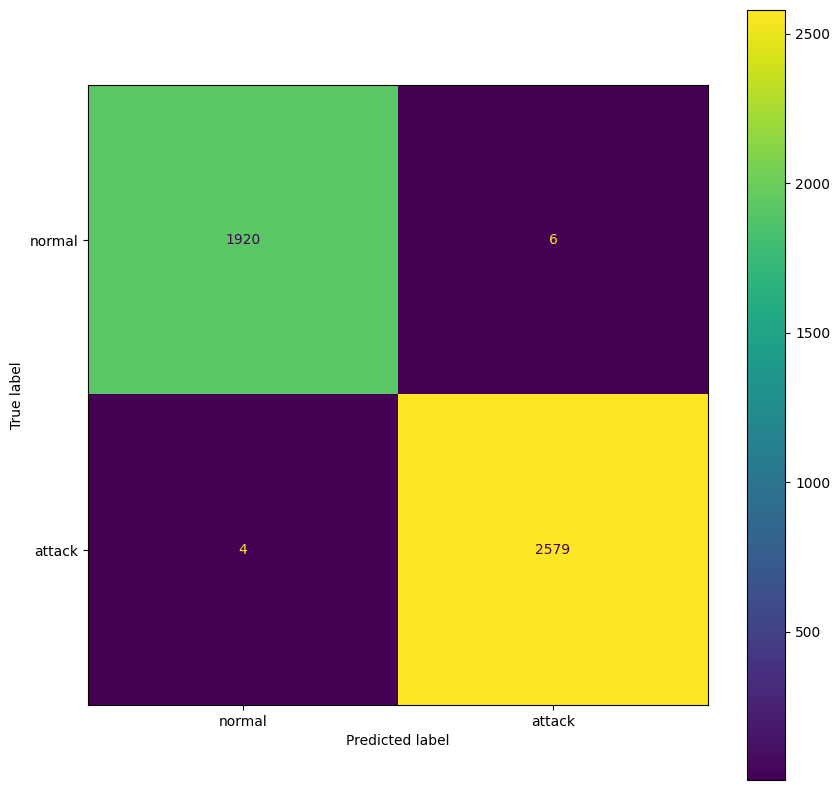

In [55]:
# Adjusted parameter grid for further tuning
param_dist_adjusted = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Classifier
rf_adjusted = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with the adjusted parameters
random_search_adjusted = RandomizedSearchCV(estimator=rf_adjusted, param_distributions=param_dist_adjusted, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the randomized search model
random_search_adjusted.fit(x_train, y_train)

# Get the best parameters
best_params_adjusted = random_search_adjusted.best_params_
print(f"Best parameters (Adjusted): {best_params_adjusted}")

# Train the Random Forest with the adjusted best parameters
rf_best_adjusted = RandomForestClassifier(**best_params_adjusted, random_state=42)
rf_best_adjusted.fit(x_train, y_train)

# Evaluate the tuned model
evaluate_classification(rf_best_adjusted, "Random Forest with Best Params (Adjusted)", x_train, x_test, y_train, y_test)

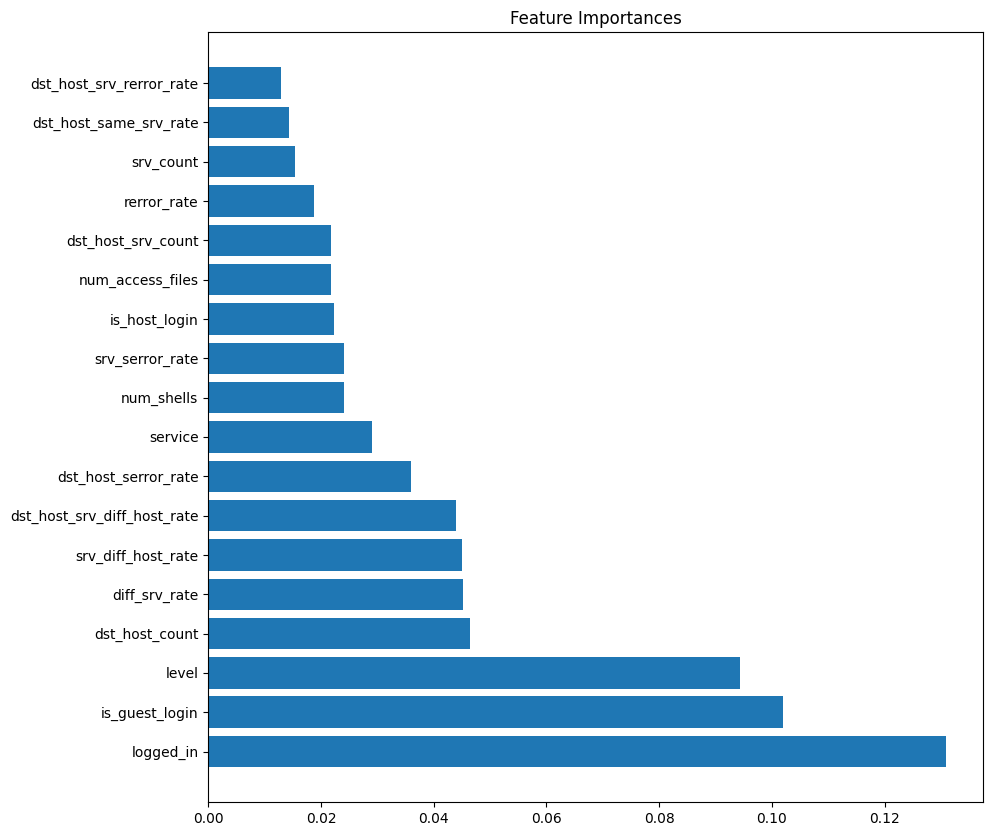

In [56]:
f_importances(abs(rf_best.feature_importances_), features_names, top=18)

XGBoost

Training Accuracy XGBoost 99.87800820672064  Test Accuracy XGBoost 99.71168773563983
Training Precesion XGBoost 99.80520112983345  Test Precesion XGBoost 99.5756172839506
Training Recall XGBoost 99.98048590106352  Test Recall XGBoost 99.92257065427798


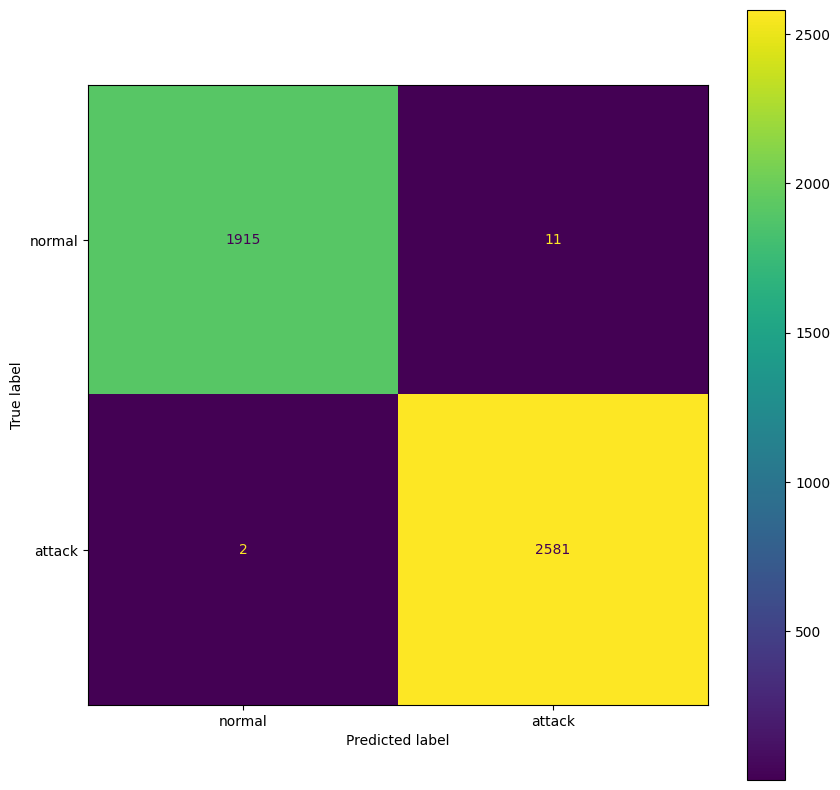

In [57]:
xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20).fit(x_train, y_train)
evaluate_classification(xg, "XGBoost", x_train, x_test, y_train, y_test)

Gradient Boosting Classifier

Training Accuracy Gradient Boosting 99.60075413108572  Test Accuracy Gradient Boosting 99.24595253936572
Training Precesion Gradient Boosting 99.3406380296713  Test Precesion Gradient Boosting 98.81271543469936
Training Recall Gradient Boosting 99.96097180212703  Test Recall Gradient Boosting 99.88385598141696


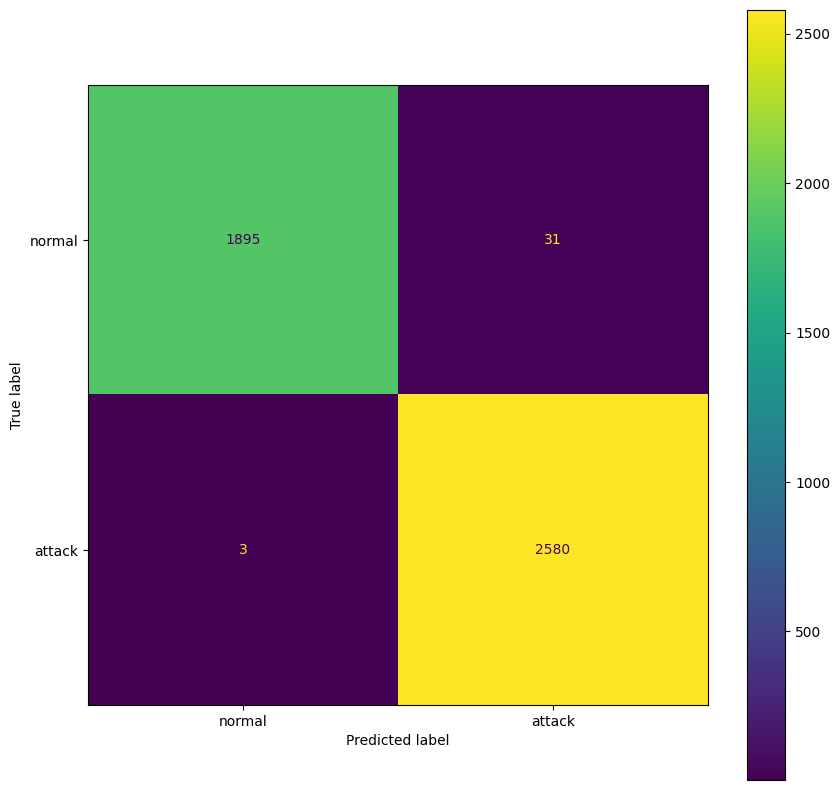

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42).fit(x_train, y_train)
evaluate_classification(gb, "Gradient Boosting", x_train, x_test, y_train, y_test)

Recurrent Neural Network (RNN) ==> (5 Epochs)

In [72]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Ensure that x_train and x_test are in float format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train, epochs=5, batch_size=64, validation_data=(X_test_rnn, y_test))

Epoch 1/5
1575/1575 [==============================] - 78s 40ms/step - loss: 0.0890 - accuracy: 0.9688 - val_loss: 0.0401 - val_accuracy: 0.9868
Epoch 2/5
1575/1575 [==============================] - 61s 39ms/step - loss: 0.0754 - accuracy: 0.9744 - val_loss: 0.0783 - val_accuracy: 0.9731
Epoch 3/5
1575/1575 [==============================] - 61s 39ms/step - loss: 0.1009 - accuracy: 0.9655 - val_loss: 0.0694 - val_accuracy: 0.9821
Epoch 4/5
1575/1575 [==============================] - 59s 38ms/step - loss: 0.0593 - accuracy: 0.9811 - val_loss: 0.0559 - val_accuracy: 0.9830
Epoch 5/5
1575/1575 [==============================] - 59s 37ms/step - loss: 0.0671 - accuracy: 0.9783 - val_loss: 0.0790 - val_accuracy: 0.9726


Convolutional Neural Network (CNN) ==> (5 Epochs)

In [73]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Ensure the data is in float32 format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train, epochs=5, batch_size=64, validation_data=(X_test_cnn, y_test))

Epoch 1/5
1575/1575 [==============================] - 49s 14ms/step - loss: 1.1646 - accuracy: 0.9752 - val_loss: 1.3754 - val_accuracy: 0.9836
Epoch 2/5
1575/1575 [==============================] - 24s 15ms/step - loss: 0.6962 - accuracy: 0.9843 - val_loss: 0.3085 - val_accuracy: 0.9873
Epoch 3/5
1575/1575 [==============================] - 22s 14ms/step - loss: 0.3216 - accuracy: 0.9858 - val_loss: 5.6819 - val_accuracy: 0.9881
Epoch 4/5
1575/1575 [==============================] - 22s 14ms/step - loss: 0.5659 - accuracy: 0.9819 - val_loss: 0.8050 - val_accuracy: 0.9860
Epoch 5/5
1575/1575 [==============================] - 22s 14ms/step - loss: 0.0979 - accuracy: 0.9845 - val_loss: 0.2334 - val_accuracy: 0.9863


In [74]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 97.26%
CNN Test Accuracy: 98.63%


Recurrent Neural Network (RNN) ==> (10 Epochs)

In [75]:
# Ensure that x_train and x_test are in float format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train, epochs= 10, batch_size=64, validation_data=(X_test_rnn, y_test))

Epoch 1/10
1575/1575 [==============================] - 59s 36ms/step - loss: 0.0937 - accuracy: 0.9691 - val_loss: 0.0568 - val_accuracy: 0.9822
Epoch 2/10
1575/1575 [==============================] - 57s 36ms/step - loss: 0.0729 - accuracy: 0.9758 - val_loss: 0.1138 - val_accuracy: 0.9565
Epoch 3/10
1575/1575 [==============================] - 58s 37ms/step - loss: 0.0801 - accuracy: 0.9729 - val_loss: 0.0876 - val_accuracy: 0.9734
Epoch 4/10
1575/1575 [==============================] - 59s 38ms/step - loss: 0.0655 - accuracy: 0.9785 - val_loss: 0.0731 - val_accuracy: 0.9750
Epoch 5/10
1575/1575 [==============================] - 58s 37ms/step - loss: 0.0799 - accuracy: 0.9737 - val_loss: 0.0606 - val_accuracy: 0.9800
Epoch 6/10
1575/1575 [==============================] - 59s 37ms/step - loss: 0.0619 - accuracy: 0.9798 - val_loss: 0.0747 - val_accuracy: 0.9742
Epoch 7/10
1575/1575 [==============================] - 60s 38ms/step - loss: 0.0708 - accuracy: 0.9762 - val_loss: 0.0684 -

Convolutional Neural Network (CNN) ==> (10 Epochs)

In [76]:
# Ensure the data is in float32 format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test))

Epoch 1/10
1575/1575 [==============================] - 25s 15ms/step - loss: 1.6755 - accuracy: 0.9703 - val_loss: 4.3442 - val_accuracy: 0.9725
Epoch 2/10
1575/1575 [==============================] - 23s 15ms/step - loss: 0.7845 - accuracy: 0.9789 - val_loss: 1.8380 - val_accuracy: 0.9771
Epoch 3/10
1575/1575 [==============================] - 25s 16ms/step - loss: 0.2342 - accuracy: 0.9858 - val_loss: 0.6009 - val_accuracy: 0.9802
Epoch 4/10
1575/1575 [==============================] - 24s 15ms/step - loss: 0.2821 - accuracy: 0.9873 - val_loss: 8.9954 - val_accuracy: 0.9662
Epoch 5/10
1575/1575 [==============================] - 24s 15ms/step - loss: 0.4959 - accuracy: 0.9874 - val_loss: 0.4291 - val_accuracy: 0.9868
Epoch 6/10
1575/1575 [==============================] - 23s 14ms/step - loss: 0.1148 - accuracy: 0.9891 - val_loss: 4.7531 - val_accuracy: 0.9915
Epoch 7/10
1575/1575 [==============================] - 22s 14ms/step - loss: 0.3413 - accuracy: 0.9899 - val_loss: 0.4771 -

In [77]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 96.18%
CNN Test Accuracy: 99.51%


Recurrent Neural Network (RNN) ==> (50 Epochs)

In [78]:
# Ensure that x_train and x_test are in float format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train, epochs= 50, batch_size=64, validation_data=(X_test_rnn, y_test))

Epoch 1/50
1575/1575 [==============================] - 63s 38ms/step - loss: 0.0900 - accuracy: 0.9712 - val_loss: 0.0589 - val_accuracy: 0.9830
Epoch 2/50
1575/1575 [==============================] - 58s 37ms/step - loss: 0.0628 - accuracy: 0.9802 - val_loss: 0.1180 - val_accuracy: 0.9523
Epoch 3/50
1575/1575 [==============================] - 60s 38ms/step - loss: 0.0541 - accuracy: 0.9834 - val_loss: 0.0555 - val_accuracy: 0.9831
Epoch 4/50
1575/1575 [==============================] - 56s 35ms/step - loss: 0.0657 - accuracy: 0.9789 - val_loss: 0.0789 - val_accuracy: 0.9756
Epoch 5/50
1575/1575 [==============================] - 57s 36ms/step - loss: 0.0641 - accuracy: 0.9797 - val_loss: 0.1167 - val_accuracy: 0.9675
Epoch 6/50
1575/1575 [==============================] - 58s 37ms/step - loss: 0.0559 - accuracy: 0.9830 - val_loss: 0.0450 - val_accuracy: 0.9876
Epoch 7/50
1575/1575 [==============================] - 55s 35ms/step - loss: 0.1641 - accuracy: 0.9437 - val_loss: 0.1996 -

Convolutional Neural Network (CNN) ==> (50 Epochs)

In [79]:
# Ensure the data is in float32 format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train, epochs = 50, batch_size=64, validation_data=(X_test_cnn, y_test))

Epoch 1/50
1575/1575 [==============================] - 28s 16ms/step - loss: 2.0741 - accuracy: 0.9746 - val_loss: 1.0796 - val_accuracy: 0.9840
Epoch 2/50
1575/1575 [==============================] - 24s 15ms/step - loss: 0.8056 - accuracy: 0.9818 - val_loss: 0.6542 - val_accuracy: 0.9808
Epoch 3/50
1575/1575 [==============================] - 24s 15ms/step - loss: 0.1539 - accuracy: 0.9848 - val_loss: 0.4300 - val_accuracy: 0.9862
Epoch 4/50
1575/1575 [==============================] - 25s 16ms/step - loss: 0.1205 - accuracy: 0.9860 - val_loss: 0.3037 - val_accuracy: 0.9913
Epoch 5/50
1575/1575 [==============================] - 25s 16ms/step - loss: 0.4562 - accuracy: 0.9860 - val_loss: 0.3106 - val_accuracy: 0.9915
Epoch 6/50
1575/1575 [==============================] - 24s 15ms/step - loss: 0.1138 - accuracy: 0.9881 - val_loss: 0.3343 - val_accuracy: 0.9925
Epoch 7/50
1575/1575 [==============================] - 24s 15ms/step - loss: 0.0934 - accuracy: 0.9885 - val_loss: 3.7227 -

In [81]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 91.43%
CNN Test Accuracy: 99.77%


Recurrent Neural Network (RNN) ==> (100 Epochs)

In [82]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

# Ensure that x_train and x_test are in float format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train, epochs = 100, batch_size=64, validation_data=(X_test_rnn, y_test))

Epoch 1/100
1575/1575 [==============================] - 58s 35ms/step - loss: 0.0914 - accuracy: 0.9721 - val_loss: 0.0609 - val_accuracy: 0.9797
Epoch 2/100
1575/1575 [==============================] - 55s 35ms/step - loss: 0.0581 - accuracy: 0.9824 - val_loss: 0.1342 - val_accuracy: 0.9617
Epoch 3/100
1575/1575 [==============================] - 54s 35ms/step - loss: 0.0524 - accuracy: 0.9843 - val_loss: 0.0384 - val_accuracy: 0.9886
Epoch 4/100
1575/1575 [==============================] - 55s 35ms/step - loss: 0.0923 - accuracy: 0.9671 - val_loss: 0.1999 - val_accuracy: 0.9312
Epoch 5/100
1575/1575 [==============================] - 56s 36ms/step - loss: 0.1842 - accuracy: 0.9343 - val_loss: 0.1135 - val_accuracy: 0.9646
Epoch 6/100
1575/1575 [==============================] - 55s 35ms/step - loss: 0.2429 - accuracy: 0.9058 - val_loss: 0.2706 - val_accuracy: 0.8743
Epoch 7/100
1575/1575 [==============================] - 54s 34ms/step - loss: 0.2631 - accuracy: 0.9017 - val_loss: 0

Convolutional Neural Network (CNN) ==> (100 Epochs)

In [83]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Ensure the data is in float32 format
X_train = x_train.astype(np.float32)
X_test = x_test.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train, epochs = 100, batch_size=64, validation_data=(X_test_cnn, y_test))

Epoch 1/100
1575/1575 [==============================] - 26s 15ms/step - loss: 2.0654 - accuracy: 0.9765 - val_loss: 0.9637 - val_accuracy: 0.9710
Epoch 2/100
1575/1575 [==============================] - 21s 13ms/step - loss: 1.5950 - accuracy: 0.9827 - val_loss: 8.5916 - val_accuracy: 0.9864
Epoch 3/100
1575/1575 [==============================] - 21s 13ms/step - loss: 1.0136 - accuracy: 0.9838 - val_loss: 0.5010 - val_accuracy: 0.9898
Epoch 4/100
1575/1575 [==============================] - 21s 14ms/step - loss: 0.2089 - accuracy: 0.9875 - val_loss: 0.3998 - val_accuracy: 0.9843
Epoch 5/100
1575/1575 [==============================] - 22s 14ms/step - loss: 0.2239 - accuracy: 0.9889 - val_loss: 0.0543 - val_accuracy: 0.9933
Epoch 6/100
1575/1575 [==============================] - 22s 14ms/step - loss: 1.3973 - accuracy: 0.9861 - val_loss: 1.3925 - val_accuracy: 0.9815
Epoch 7/100
1575/1575 [==============================] - 22s 14ms/step - loss: 0.3013 - accuracy: 0.9891 - val_loss: 0

In [84]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 88.04%
CNN Test Accuracy: 98.91%


# Comparison Between Model (outcome classifcation without using PCA)

Accuracy

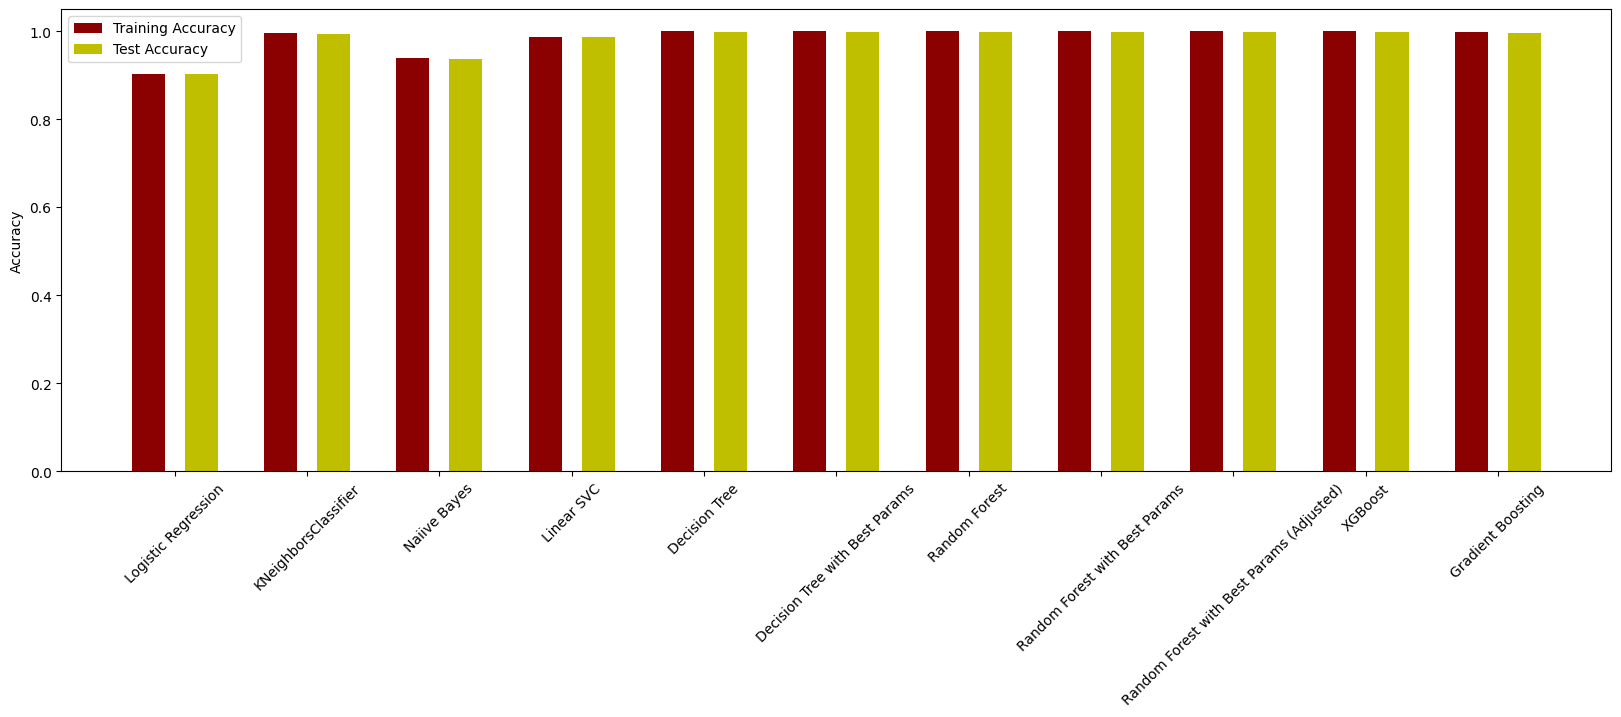

In [85]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

Precesion

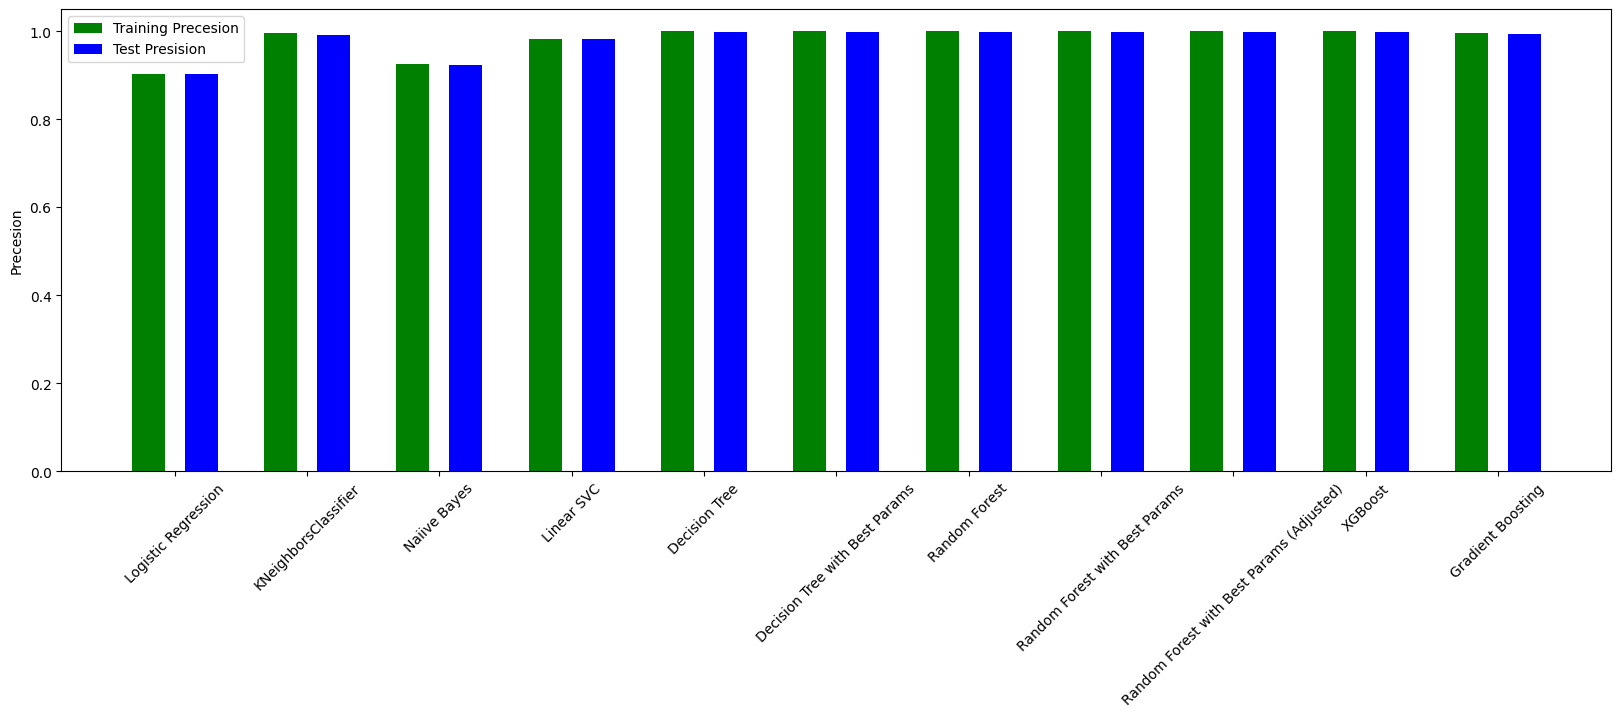

In [86]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.xticks(rotation=45)
plt.show()

Recall

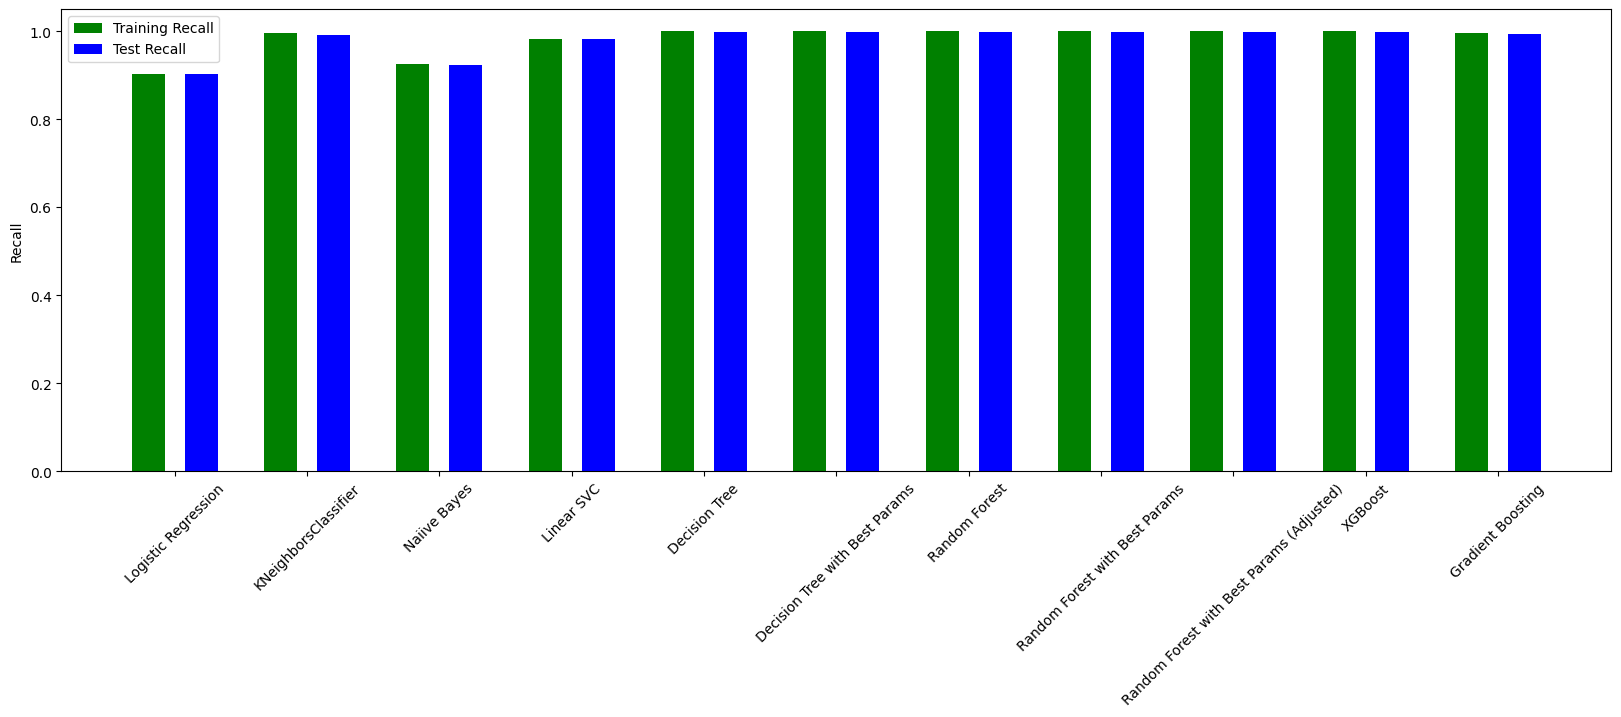

In [87]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[4] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[5] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.xticks(rotation=45)
plt.show()

# Classification outcome column (Using PCA analysis)

X ==> PCA analysis columns   and Y ==> outcome Column

Measuring effect of PCA (PCA + Logistic Regression)

Training Accuracy PCA Logistic Regression 92.26013872212906  Test Accuracy PCA Logistic Regression 92.19686445723357
Training Precesion PCA Logistic Regression 89.29053305676943  Test Precesion PCA Logistic Regression 89.48888710583327
Training Recall PCA Logistic Regression 94.69895986843511  Test Recall PCA Logistic Regression 94.44491489541875


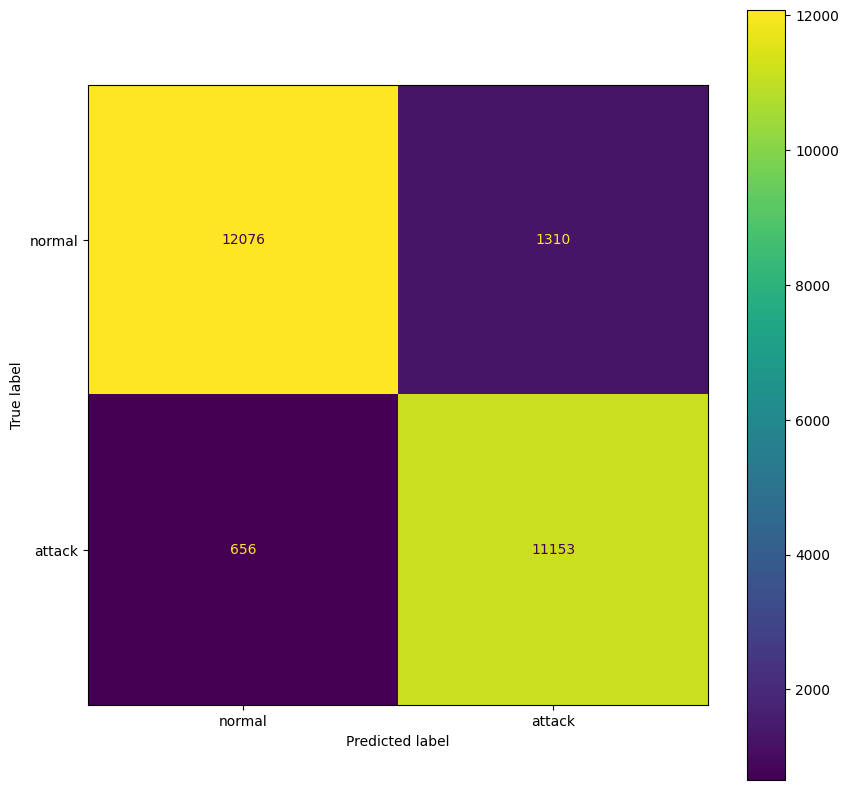

In [88]:
lrr = LogisticRegression().fit(x_train_reduced, y_train_reduced)
evaluate_classification(lrr, "PCA Logistic Regression", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + KNN)

Training Accuracy PCA KNN 99.56835389027259  Test Accuracy PCA KNN 99.34510815638023
Training Precesion PCA KNN 99.54922235515296  Test Precesion PCA KNN 99.2055442866802
Training Recall PCA KNN 99.52158219602315  Test Recall PCA KNN 99.39876365483953


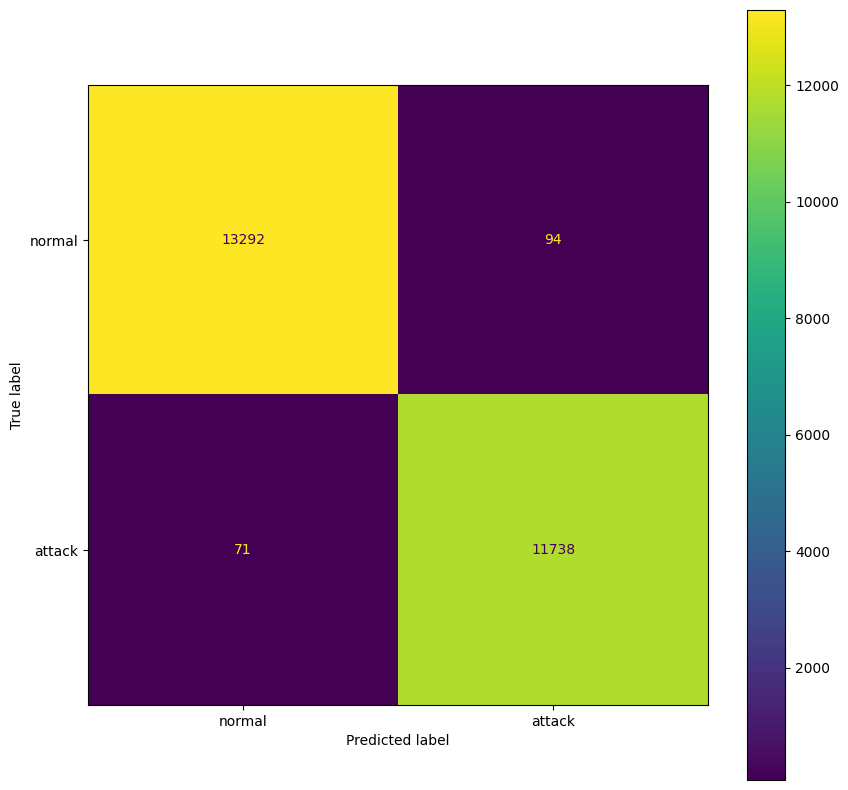

In [89]:
knnpca = KNeighborsClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(knnpca, "PCA KNN", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + Naiive Bayes)

Training Accuracy PCA Naiive Bayes 63.725850144378185  Test Accuracy PCA Naiive Bayes 63.31811867434015
Training Precesion PCA Naiive Bayes 84.23720899206191  Test Precesion PCA Naiive Bayes 83.34632372044688
Training Recall PCA Naiive Bayes 26.970803699194807  Test Recall PCA Naiive Bayes 27.165721060208313


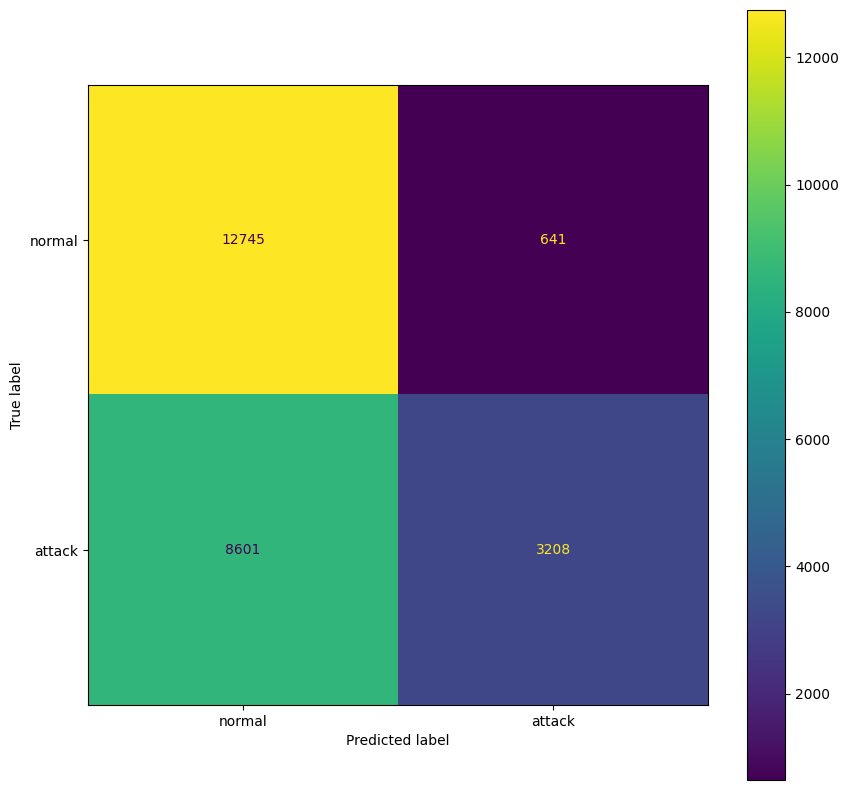

In [90]:
naivepca = GaussianNB().fit(x_train_reduced, y_train_reduced)
evaluate_classification(naivepca, "PCA Naiive Bayes", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + SVM)

Training Accuracy PCA SVM 97.78917808626969  Test Accuracy PCA SVM 97.77733677316928
Training Precesion PCA SVM 97.13548823541848  Test Precesion PCA SVM 97.22898648081284
Training Recall PCA SVM 98.13545204075095  Test Recall PCA SVM 98.05233296638157


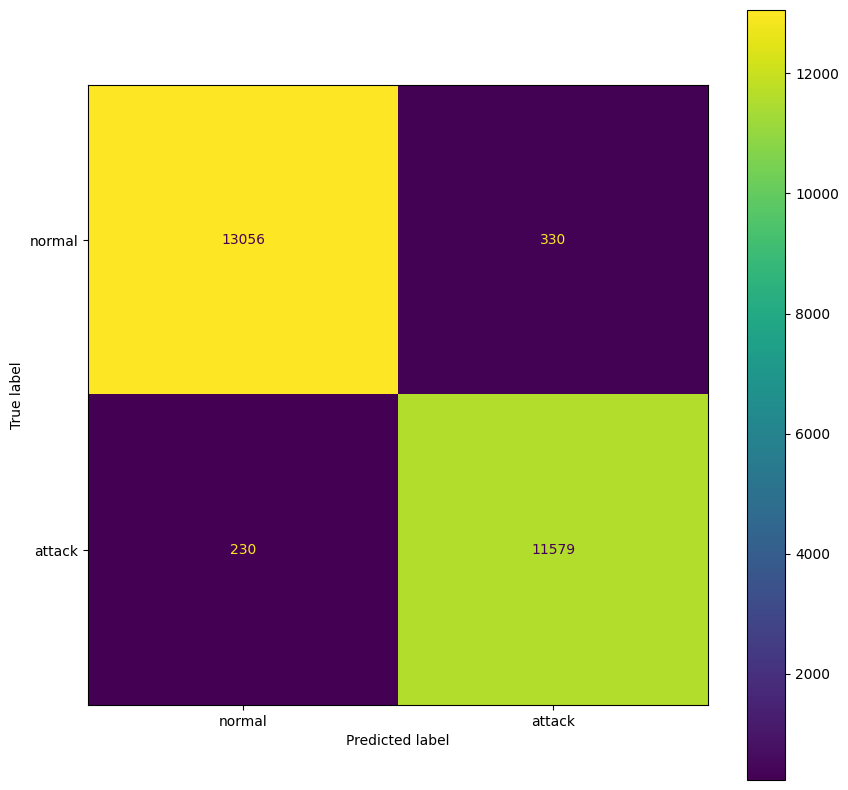

In [91]:
svv = svm.LinearSVC().fit(x_train_reduced, y_train_reduced)
evaluate_classification(svv, "PCA SVM", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + Decsion Tree)

Training Accuracy PCA Decsion Tree 100.0  Test Accuracy PCA Decsion Tree 99.82139313355825
Training Precesion PCA Decsion Tree 100.0  Test Precesion PCA Decsion Tree 99.79681679647815
Training Recall PCA Decsion Tree 100.0  Test Recall PCA Decsion Tree 99.8221695317131


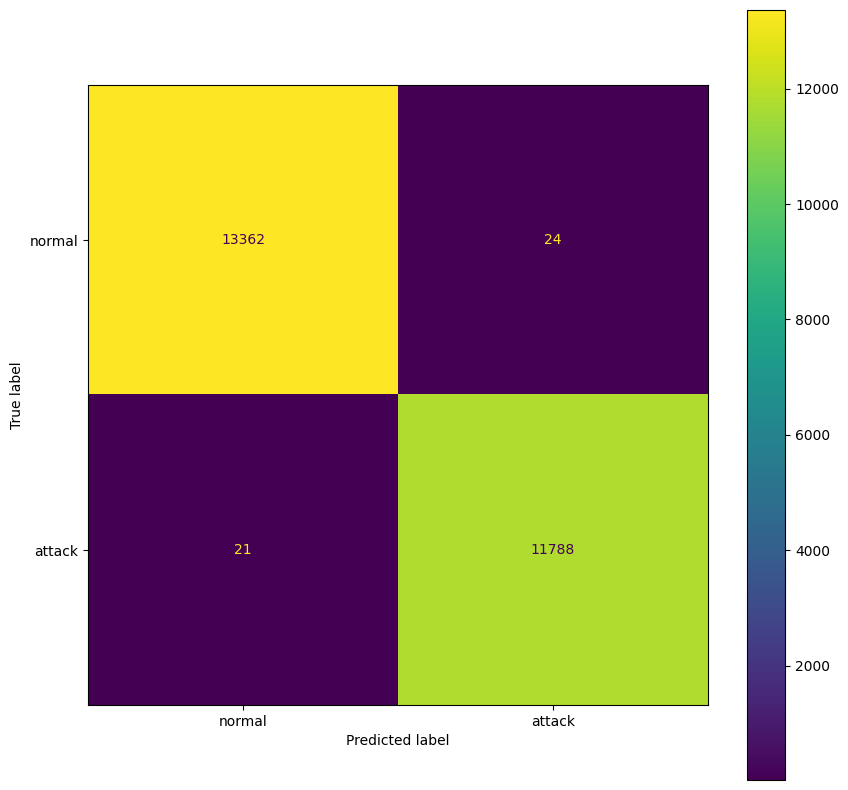

In [92]:
drr = DecisionTreeClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(drr, "PCA Decsion Tree", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Handle 100% Accuracy

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 50, 'criterion': 'entropy'}
Training Accuracy PCA Decision Tree with Best Params 99.96626214314774  Test Accuracy PCA Decision Tree with Best Params 99.84123834094066
Training Precesion PCA Decision Tree with Best Params 99.99145207821348  Test Precesion PCA Decision Tree with Best Params 99.80533220482437
Training Recall PCA Decision Tree with Best Params 99.93592618696738  Test Recall PCA Decision Tree with Best Params 99.85604200186299


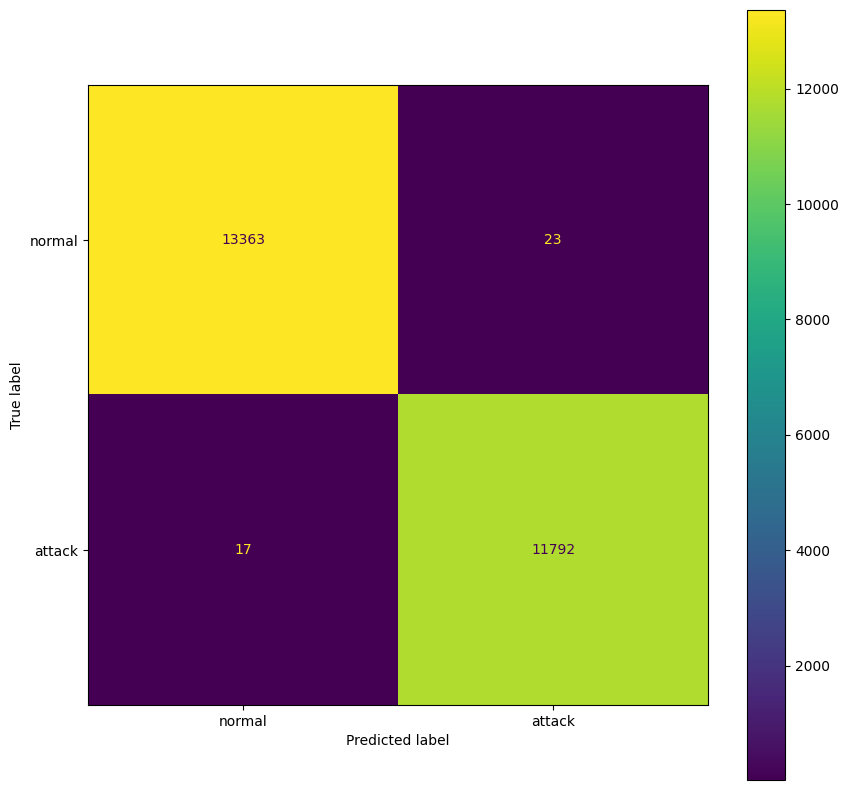

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


# Define the parameter grid
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='accuracy')

# Fit the random search model
random_search.fit(x_train_reduced, y_train_reduced)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Decision Tree with the best parameters
dt_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_best.fit(x_train_reduced, y_train_reduced)

evaluate_classification(dt_best, "PCA Decision Tree with Best Params", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + Random Forest)

Training Accuracy PCA RandomForest 100.0  Test Accuracy PCA RandomForest 99.93252629489979
Training Precesion PCA RandomForest 100.0  Test Precesion PCA RandomForest 99.89844278943805
Training Recall PCA RandomForest 100.0  Test Recall PCA RandomForest 99.95765941231264


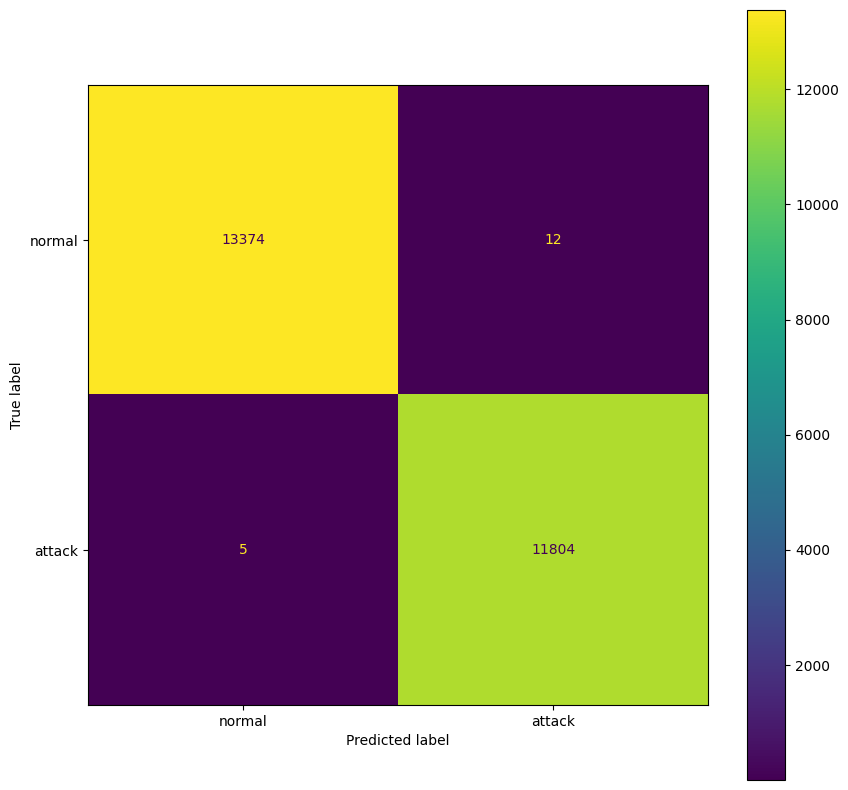

In [93]:
rrf = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(rrf, "PCA RandomForest", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Handle 100% Accuracy

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters (Adjusted): {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 50}
Training Accuracy PCA Random Forest with Best Params (Adjusted) 99.99305397064806  Test Accuracy PCA Random Forest with Best Params (Adjusted) 99.92061917047033
Training Precesion PCA Random Forest with Best Params (Adjusted) 99.98932171535965  Test Precesion PCA Random Forest with Best Params (Adjusted) 99.88997037663987
Training Recall PCA Random Forest with Best Params (Adjusted) 99.99572841246449  Test Recall PCA Random Forest with Best Params (Adjusted) 99.9407231772377


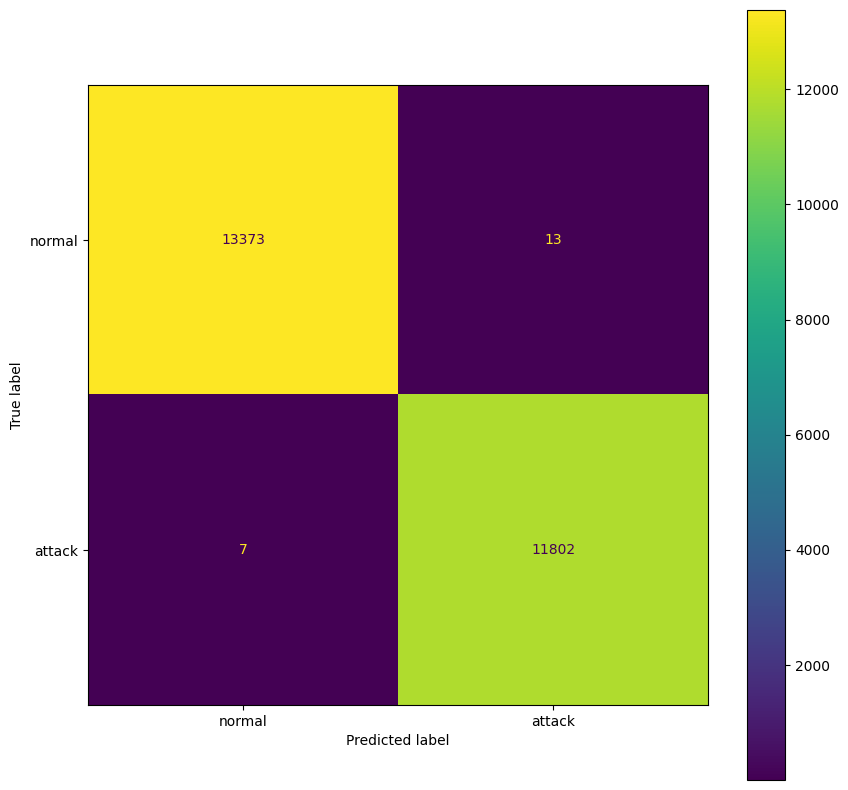

In [48]:
# Adjusted parameter grid for further tuning
param_dist_adjusted = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8],
    'max_features': ['auto', 'sqrt']
}

# Initialize the Random Forest Classifier
rf_adjusted = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with the adjusted parameters
random_search_adjusted = RandomizedSearchCV(estimator=rf_adjusted, param_distributions=param_dist_adjusted, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit the randomized search model
random_search_adjusted.fit(x_train_reduced, y_train_reduced)

# Get the best parameters
best_params_adjusted = random_search_adjusted.best_params_
print(f"Best parameters (Adjusted): {best_params_adjusted}")

# Train the Random Forest with the adjusted best parameters
rf_best_adjusted = RandomForestClassifier(**best_params_adjusted, random_state=42)
rf_best_adjusted.fit(x_train_reduced, y_train_reduced)

# Evaluate the tuned model
evaluate_classification(rf_best_adjusted, "PCA Random Forest with Best Params (Adjusted)", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + XGBoost)

Training Accuracy PCA XGBoost 99.93252428629549  Test Accuracy PCA XGBoost 99.88886683865846
Training Precesion PCA XGBoost 99.91672182955735  Test Precesion PCA XGBoost 99.86455599762974
Training Recall PCA XGBoost 99.93806198073514  Test Recall PCA XGBoost 99.89838258955034


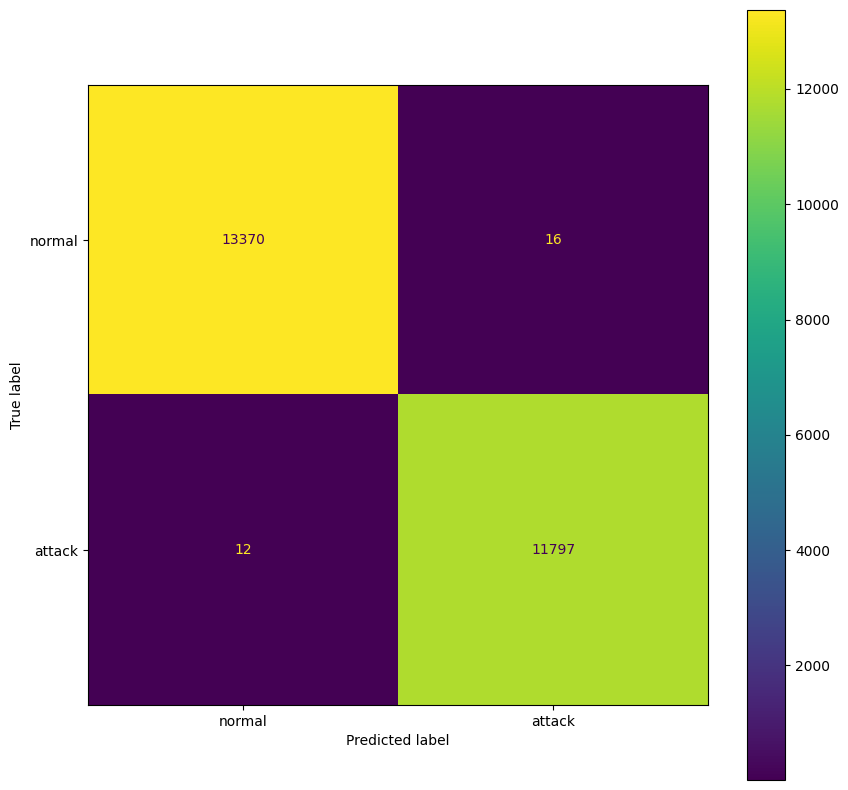

In [94]:
xgboostpca = xgb.XGBClassifier(objective='binary:logistic', n_estimators=20).fit(x_train_reduced, y_train_reduced)
evaluate_classification(xgboostpca, "PCA XGBoost", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Measuring effect of PCA (PCA + Gradient Boosting)

Training Accuracy PCA Gradient Boosting 99.7023130277742  Test Accuracy PCA Gradient Boosting 99.63881722564001
Training Precesion PCA Gradient Boosting 99.55262989710488  Test Precesion PCA Gradient Boosting 99.47643979057592
Training Recall PCA Gradient Boosting 99.80777856090216  Test Recall PCA Gradient Boosting 99.75442459141333


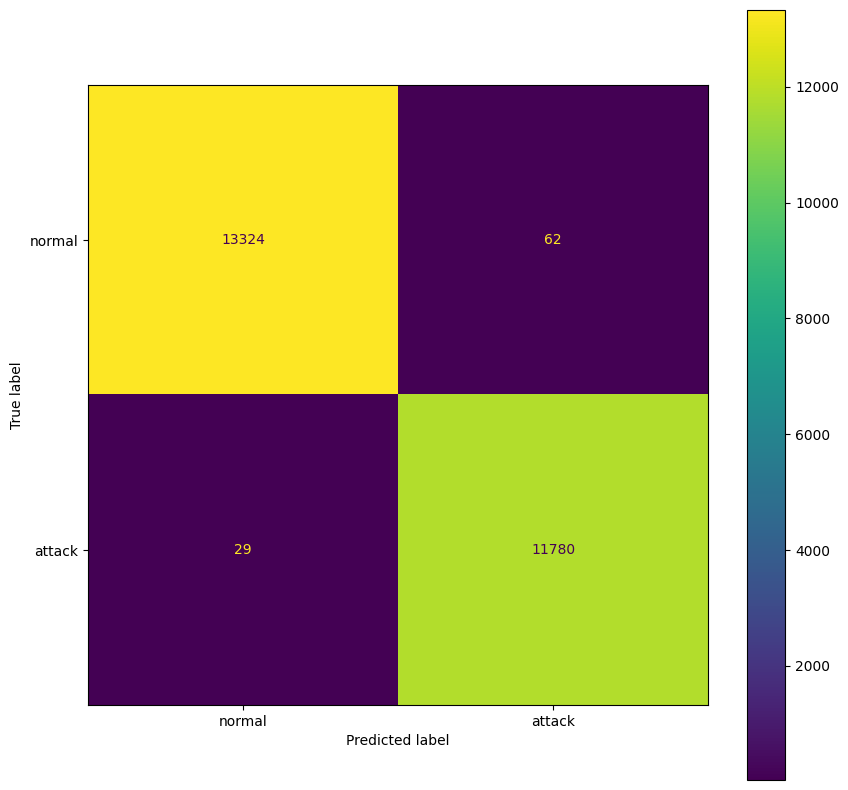

In [95]:
grb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42).fit(x_train_reduced, y_train_reduced)
evaluate_classification(grb, "PCA Gradient Boosting", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

Recurrent Neural Network (RNN) ==> (5 Epochs)

In [96]:
# Ensure that x_train and x_test are in float format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train_reduced, epochs= 5, batch_size=64, validation_data=(X_test_rnn, y_test_reduced))

Epoch 1/5
1575/1575 [==============================] - 26s 10ms/step - loss: 0.0518 - accuracy: 0.9810 - val_loss: 0.0317 - val_accuracy: 0.9894
Epoch 2/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0247 - accuracy: 0.9912 - val_loss: 0.0218 - val_accuracy: 0.9907
Epoch 3/5
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0194 - accuracy: 0.9929 - val_loss: 0.0209 - val_accuracy: 0.9928
Epoch 4/5
1575/1575 [==============================] - 15s 9ms/step - loss: 0.0164 - accuracy: 0.9943 - val_loss: 0.0155 - val_accuracy: 0.9946
Epoch 5/5
1575/1575 [==============================] - 15s 10ms/step - loss: 0.0140 - accuracy: 0.9951 - val_loss: 0.0133 - val_accuracy: 0.9948


Convolutional Neural Network (CNN) ==> (5 Epochs)

In [97]:
#  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced
# Ensure the data is in float32 format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train_reduced, epochs=5, batch_size=64, validation_data=(X_test_cnn, y_test_reduced))

Epoch 1/5
1575/1575 [==============================] - 14s 7ms/step - loss: 2.2940 - accuracy: 0.9413 - val_loss: 0.7012 - val_accuracy: 0.9727
Epoch 2/5
1575/1575 [==============================] - 10s 7ms/step - loss: 1.2834 - accuracy: 0.9696 - val_loss: 1.9474 - val_accuracy: 0.9654
Epoch 3/5
1575/1575 [==============================] - 10s 7ms/step - loss: 0.4896 - accuracy: 0.9710 - val_loss: 0.6382 - val_accuracy: 0.9810
Epoch 4/5
1575/1575 [==============================] - 10s 6ms/step - loss: 0.2299 - accuracy: 0.9747 - val_loss: 1.0108 - val_accuracy: 0.9762
Epoch 5/5
1575/1575 [==============================] - 10s 7ms/step - loss: 0.1606 - accuracy: 0.9755 - val_loss: 1.3199 - val_accuracy: 0.9729


In [98]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 99.48%
CNN Test Accuracy: 97.29%


Recurrent Neural Network (RNN) ==> (10 Epochs)

In [99]:
# Ensure that x_train and x_test are in float format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train_reduced, epochs= 10, batch_size=64, validation_data=(X_test_rnn, y_test_reduced))

Epoch 1/10
1575/1575 [==============================] - 20s 10ms/step - loss: 0.0555 - accuracy: 0.9797 - val_loss: 0.0296 - val_accuracy: 0.9894
Epoch 2/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0250 - accuracy: 0.9914 - val_loss: 0.0239 - val_accuracy: 0.9921
Epoch 3/10
1575/1575 [==============================] - 15s 9ms/step - loss: 0.0185 - accuracy: 0.9936 - val_loss: 0.0149 - val_accuracy: 0.9954
Epoch 4/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0168 - val_accuracy: 0.9949
Epoch 5/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0140 - accuracy: 0.9950 - val_loss: 0.0172 - val_accuracy: 0.9938
Epoch 6/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0129 - accuracy: 0.9954 - val_loss: 0.0144 - val_accuracy: 0.9957
Epoch 7/10
1575/1575 [==============================] - 14s 9ms/step - loss: 0.0122 - accuracy: 0.9956 - val_loss: 0.0128 - val_a

Convolutional Neural Network (CNN) ==> (10 Epochs)

In [100]:
#  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced
# Ensure the data is in float32 format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train_reduced, epochs=10, batch_size=64, validation_data=(X_test_cnn, y_test_reduced))

Epoch 1/10
1575/1575 [==============================] - 46s 7ms/step - loss: 2.9947 - accuracy: 0.9531 - val_loss: 1.4290 - val_accuracy: 0.9619
Epoch 2/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.8148 - accuracy: 0.9679 - val_loss: 1.1465 - val_accuracy: 0.9515
Epoch 3/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.3301 - accuracy: 0.9705 - val_loss: 0.7679 - val_accuracy: 0.9708
Epoch 4/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.2752 - accuracy: 0.9716 - val_loss: 1.2127 - val_accuracy: 0.9791
Epoch 5/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.5278 - accuracy: 0.9691 - val_loss: 0.6982 - val_accuracy: 0.9408
Epoch 6/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.2656 - accuracy: 0.9723 - val_loss: 0.7701 - val_accuracy: 0.9797
Epoch 7/10
1575/1575 [==============================] - 10s 6ms/step - loss: 0.1690 - accuracy: 0.9706 - val_loss: 0.6558 - val_ac

In [101]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 99.64%
CNN Test Accuracy: 98.38%


Recurrent Neural Network (RNN) ==> (50 Epochs)

In [102]:
# Ensure that x_train and x_test are in float format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train_reduced, epochs= 50, batch_size=64, validation_data=(X_test_rnn, y_test_reduced))

Epoch 1/50
1575/1575 [==============================] - 16s 9ms/step - loss: 0.0516 - accuracy: 0.9807 - val_loss: 0.0240 - val_accuracy: 0.9918
Epoch 2/50
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0221 - accuracy: 0.9923 - val_loss: 0.0191 - val_accuracy: 0.9939
Epoch 3/50
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0175 - accuracy: 0.9936 - val_loss: 0.0201 - val_accuracy: 0.9933
Epoch 4/50
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0143 - accuracy: 0.9950 - val_loss: 0.0162 - val_accuracy: 0.9944
Epoch 5/50
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0130 - accuracy: 0.9952 - val_loss: 0.0113 - val_accuracy: 0.9962
Epoch 6/50
1575/1575 [==============================] - 13s 9ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.0133 - val_accuracy: 0.9952
Epoch 7/50
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0106 - accuracy: 0.9963 - val_loss: 0.0130 - val_ac

Convolutional Neural Network (CNN) ==> (50 Epochs)

In [103]:
#  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced
# Ensure the data is in float32 format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train_reduced, epochs = 50, batch_size=64, validation_data=(X_test_cnn, y_test_reduced))

Epoch 1/50
1575/1575 [==============================] - 11s 6ms/step - loss: 2.6540 - accuracy: 0.9524 - val_loss: 1.2219 - val_accuracy: 0.9701
Epoch 2/50
1575/1575 [==============================] - 9s 6ms/step - loss: 1.1900 - accuracy: 0.9678 - val_loss: 1.7823 - val_accuracy: 0.9809
Epoch 3/50
1575/1575 [==============================] - 9s 6ms/step - loss: 0.3747 - accuracy: 0.9730 - val_loss: 0.8227 - val_accuracy: 0.9773
Epoch 4/50
1575/1575 [==============================] - 9s 6ms/step - loss: 0.5142 - accuracy: 0.9726 - val_loss: 0.8903 - val_accuracy: 0.9656
Epoch 5/50
1575/1575 [==============================] - 10s 6ms/step - loss: 0.1928 - accuracy: 0.9748 - val_loss: 2.3134 - val_accuracy: 0.9797
Epoch 6/50
1575/1575 [==============================] - 9s 6ms/step - loss: 0.2224 - accuracy: 0.9763 - val_loss: 2.1021 - val_accuracy: 0.9342
Epoch 7/50
1575/1575 [==============================] - 9s 6ms/step - loss: 0.1328 - accuracy: 0.9757 - val_loss: 1.7966 - val_accurac

In [104]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 99.76%
CNN Test Accuracy: 98.23%


Recurrent Neural Network (RNN) ==> (100 Epochs)

In [105]:
# Ensure that x_train and x_test are in float format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data to fit RNN input requirements: (samples, timesteps, features)
X_train_rnn = np.expand_dims(X_train, axis=-1)
X_test_rnn = np.expand_dims(X_test, axis=-1)

# Define RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(50, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
rnn_model.fit(X_train_rnn, y_train_reduced, epochs= 100, batch_size=64, validation_data=(X_test_rnn, y_test_reduced))

Epoch 1/100
1575/1575 [==============================] - 15s 8ms/step - loss: 0.0514 - accuracy: 0.9815 - val_loss: 0.0281 - val_accuracy: 0.9898
Epoch 2/100
1575/1575 [==============================] - 12s 8ms/step - loss: 0.0222 - accuracy: 0.9921 - val_loss: 0.0222 - val_accuracy: 0.9929
Epoch 3/100
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0176 - accuracy: 0.9939 - val_loss: 0.0158 - val_accuracy: 0.9946
Epoch 4/100
1575/1575 [==============================] - 12s 8ms/step - loss: 0.0147 - accuracy: 0.9945 - val_loss: 0.0151 - val_accuracy: 0.9952
Epoch 5/100
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0136 - accuracy: 0.9952 - val_loss: 0.0117 - val_accuracy: 0.9960
Epoch 6/100
1575/1575 [==============================] - 12s 8ms/step - loss: 0.0123 - accuracy: 0.9955 - val_loss: 0.0137 - val_accuracy: 0.9959
Epoch 7/100
1575/1575 [==============================] - 13s 8ms/step - loss: 0.0107 - accuracy: 0.9963 - val_loss: 0.0119 -

Convolutional Neural Network (CNN) ==> (100 Epochs)

In [106]:
#  x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced
# Ensure the data is in float32 format
X_train = x_train_reduced.astype(np.float32)
X_test = x_test_reduced.astype(np.float32)

# Reshape the data for CNN input
X_train_cnn = np.expand_dims(X_train, axis=-1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# Define CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
cnn_model.fit(X_train_cnn, y_train_reduced, epochs = 100, batch_size=64, validation_data=(X_test_cnn, y_test_reduced))

Epoch 1/100
1575/1575 [==============================] - 11s 6ms/step - loss: 2.5706 - accuracy: 0.9349 - val_loss: 4.7686 - val_accuracy: 0.9568
Epoch 2/100
1575/1575 [==============================] - 9s 6ms/step - loss: 0.8169 - accuracy: 0.9685 - val_loss: 1.5003 - val_accuracy: 0.9564
Epoch 3/100
1575/1575 [==============================] - 9s 6ms/step - loss: 0.4955 - accuracy: 0.9719 - val_loss: 0.5691 - val_accuracy: 0.9762
Epoch 4/100
1575/1575 [==============================] - 9s 6ms/step - loss: 0.3108 - accuracy: 0.9736 - val_loss: 0.5853 - val_accuracy: 0.9704
Epoch 5/100
1575/1575 [==============================] - 9s 6ms/step - loss: 0.1930 - accuracy: 0.9748 - val_loss: 1.0433 - val_accuracy: 0.9678
Epoch 6/100
1575/1575 [==============================] - 9s 6ms/step - loss: 0.1571 - accuracy: 0.9758 - val_loss: 0.7991 - val_accuracy: 0.9829
Epoch 7/100
1575/1575 [==============================] - 9s 6ms/step - loss: 0.1144 - accuracy: 0.9768 - val_loss: 0.3504 - val_a

In [107]:
# Evaluate RNN model
rnn_scores = rnn_model.evaluate(X_test_rnn, y_test, verbose=0)
print(f'RNN Test Accuracy: {rnn_scores[1]*100:.2f}%')

# Evaluate CNN model
cnn_scores = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
print(f'CNN Test Accuracy: {cnn_scores[1]*100:.2f}%')

RNN Test Accuracy: 99.80%
CNN Test Accuracy: 98.53%


# Comparison Between Model (Using PCA & Without PCA)

Accuracy

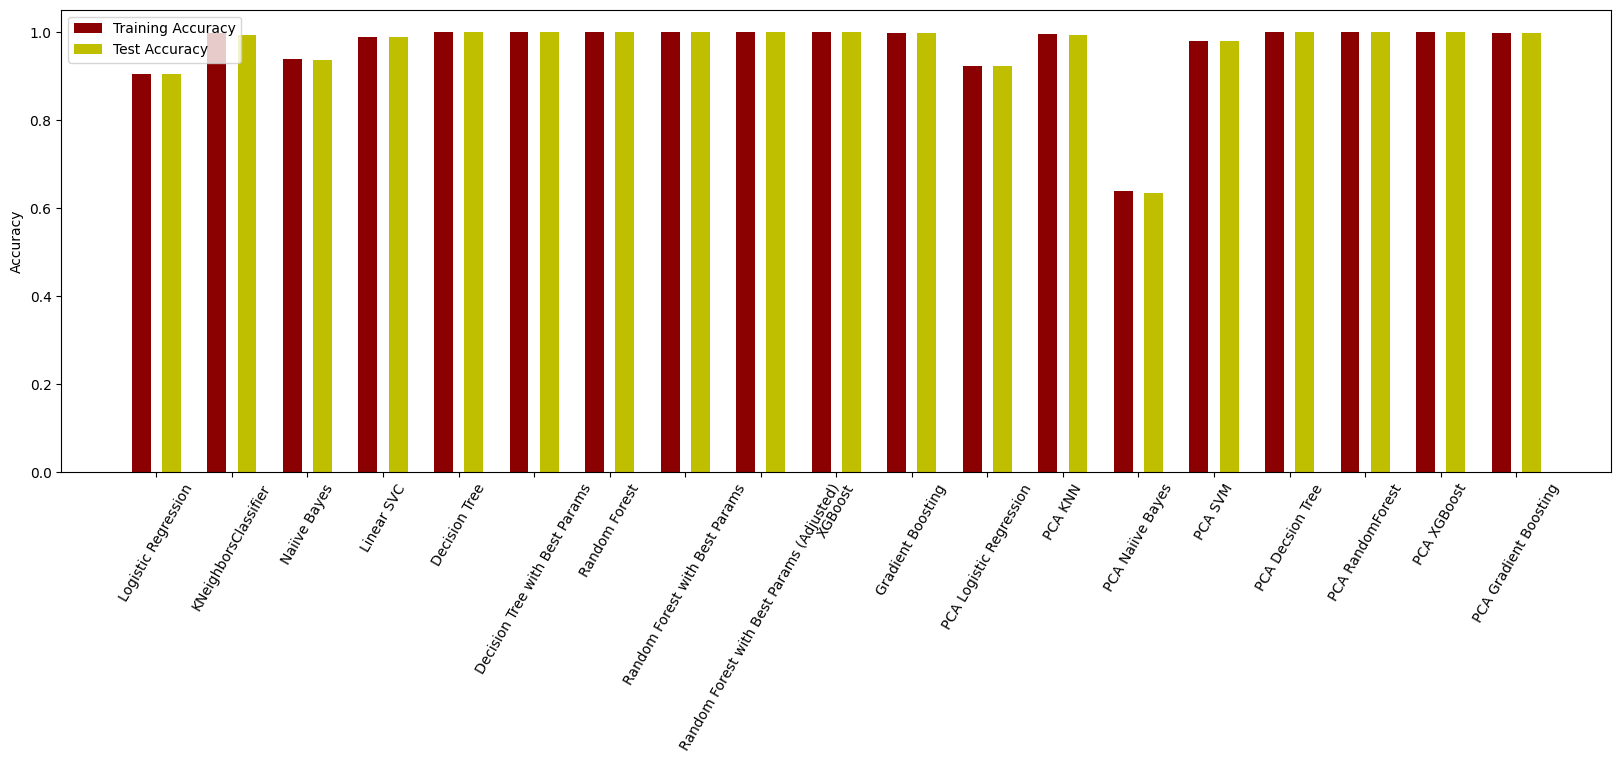

In [108]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.xticks(rotation=60)
plt.show()

Precesion

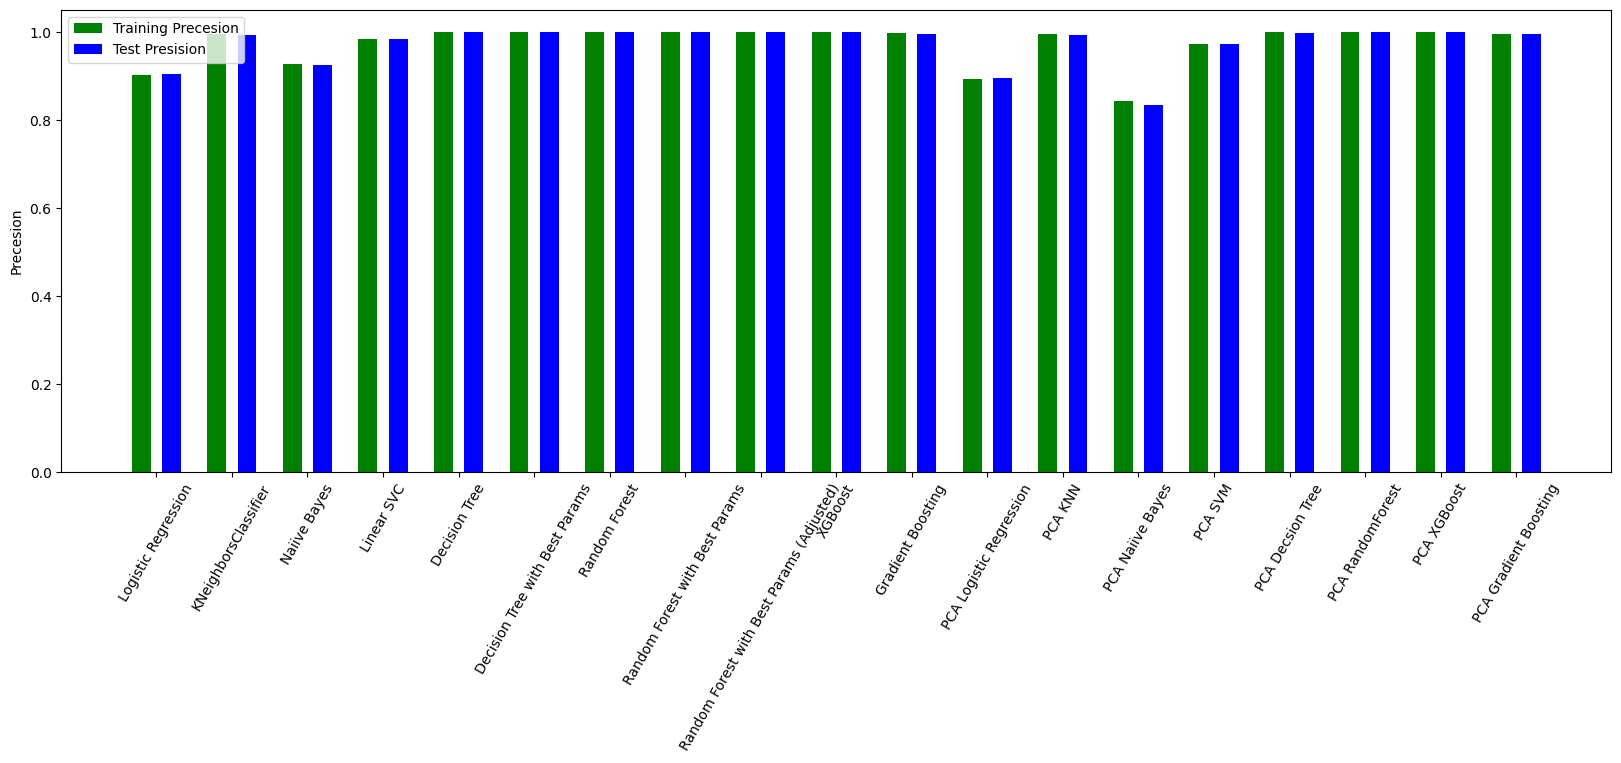

In [109]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.xticks(rotation=60)
plt.show()

Recall

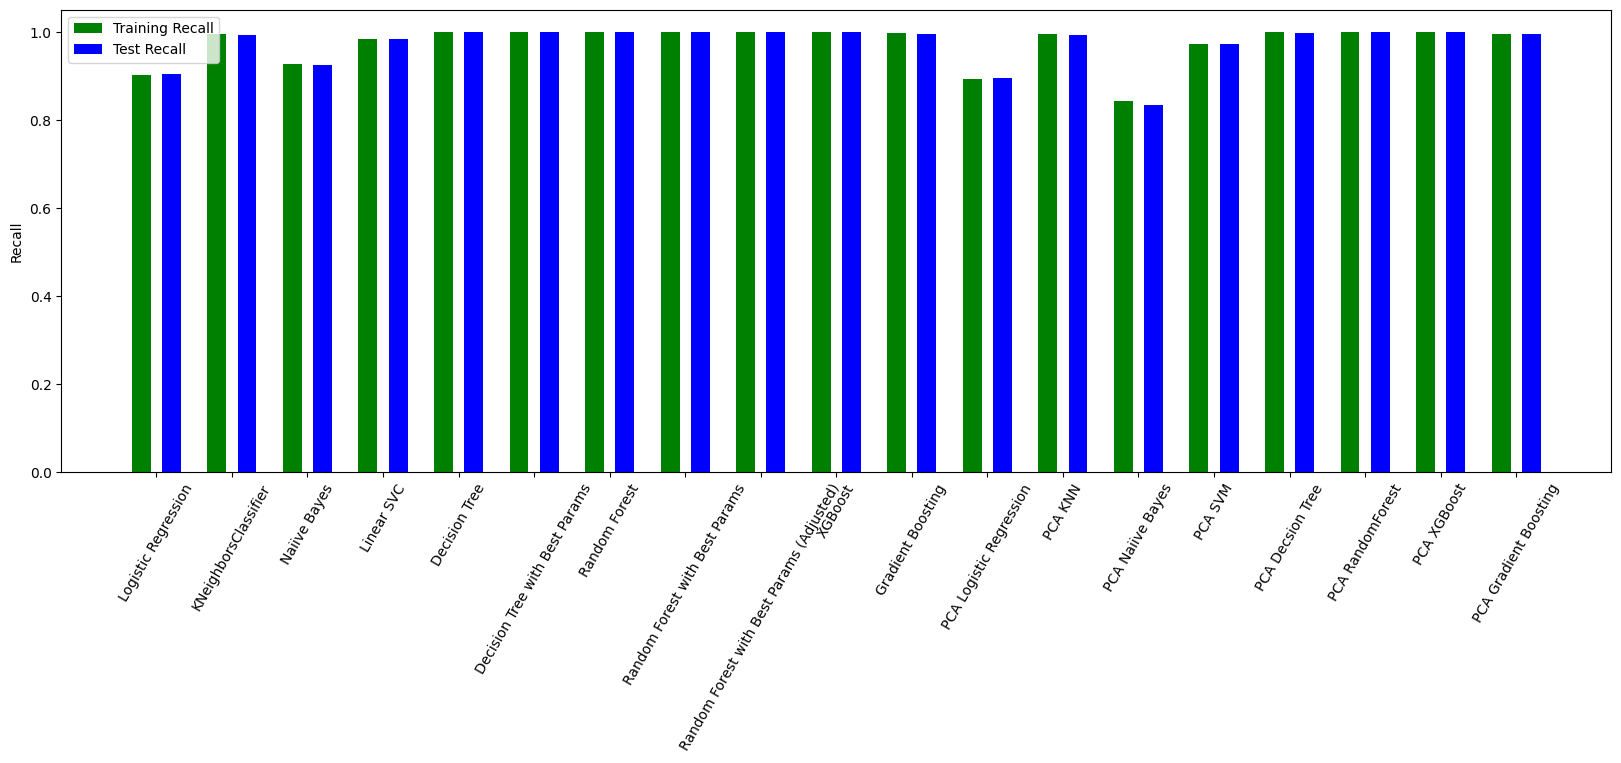

In [110]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[4] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[5] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.xticks(rotation=60)
plt.show()

# Regression Method

In [45]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
kernal_evals2 = dict()
def evaluate_regression(model, name, X_train, X_test, y_train, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    
    train_r2 = r2_score(y_train, train_preds)
    test_r2 = r2_score(y_test, test_preds)
    
    train_ev = explained_variance_score(y_train, train_preds)
    test_ev = explained_variance_score(y_test, test_preds)

    kernal_evals2[str(name)] = [train_mse, test_mse, train_r2, test_r2, train_ev, test_ev]
    print(f"Training Mean Squared Error {name}: {train_mse:.4f}")
    print(f"Test Mean Squared Error {name}: {test_mse:.4f}")
    print(f"Training R^2 Score {name}: {train_r2:.4f}")
    print(f"Test R^2 Score {name}: {test_r2:.4f}")
    print(f"Training Explained Variance {name}: {train_ev:.4f}")
    print(f"Test Explained Variance {name}: {test_ev:.4f}")
    
    return train_preds, test_preds  # Return predictions if needed


# Prediction Level Columns (Regression Problem)

In [46]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical features
categorical_columns = ['protocol_type', 'service', 'flag', 'land', 'logged_in', 'is_host_login', 'is_guest_login']

# Apply label encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data_train[col] = le.fit_transform(data_train[col])
    label_encoders[col] = le

# Separate features and target
X = data_train.drop(['level'], axis=1)
y_reg = data_train['level']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Split the dataset into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)
X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2 = train_test_split(x_reduced, y_reg, test_size=0.2, random_state=42)

# Level Columns (Using Original Columns)

Note: X ==> All Columns except(level)  and Y ==> Level Column

Linear Regression  (Thread Level)

In [49]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0).fit(X_train_reg, y_train_reg)
train_preds, test_preds = evaluate_regression(ridge_reg, "LR Level Analaysis", X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Training Mean Squared Error LR Level Analaysis: 2.6970
Test Mean Squared Error LR Level Analaysis: 2.6899
Training R^2 Score LR Level Analaysis: 0.4859
Test R^2 Score LR Level Analaysis: 0.4895
Training Explained Variance LR Level Analaysis: 0.4859
Test Explained Variance LR Level Analaysis: 0.4895


KNN  (Thread Level)

In [50]:
from sklearn.neighbors import KNeighborsRegressor
# n = 5 ==> Overfitting ==> 0.022
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train_reg, y_train_reg)
train_preds_bayes, test_preds_bayes = evaluate_regression(knn, "KNN Level Analaysis", X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Training Mean Squared Error KNN Level Analaysis: 0.2513
Test Mean Squared Error KNN Level Analaysis: 0.3685
Training R^2 Score KNN Level Analaysis: 0.9521
Test R^2 Score KNN Level Analaysis: 0.9301
Training Explained Variance KNN Level Analaysis: 0.9521
Test Explained Variance KNN Level Analaysis: 0.9301


Handle Overfitting

In [51]:
# n = 8 ==> Small Overfitting ==> 0.0157
knn = KNeighborsRegressor(n_neighbors = 8).fit(X_train_reg, y_train_reg)
train_preds_bayes, test_preds_bayes = evaluate_regression(knn, "KNN Level Analaysis", X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Training Mean Squared Error KNN Regression: 0.3461
Test Mean Squared Error KNN Regression: 0.4305
Training R^2 Score KNN Regression: 0.9340
Test R^2 Score KNN Regression: 0.9183
Training Explained Variance KNN Regression: 0.9342
Test Explained Variance KNN Regression: 0.9185


In [52]:
# n = 9 ==> No Overfitting ==> 0.143
knn = KNeighborsRegressor(n_neighbors = 9).fit(X_train_reg, y_train_reg)
train_preds_bayes, test_preds_bayes = evaluate_regression(knn, "KNN Level Analaysis", X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Training Mean Squared Error KNN Level Analaysis: 0.3746
Test Mean Squared Error KNN Level Analaysis: 0.4515
Training R^2 Score KNN Level Analaysis: 0.9286
Test R^2 Score KNN Level Analaysis: 0.9143
Training Explained Variance KNN Level Analaysis: 0.9288
Test Explained Variance KNN Level Analaysis: 0.9145


In [53]:
# n = 10 ==> No Overfitting ==> 0.0122
knn = KNeighborsRegressor(n_neighbors = 10).fit(X_train_reg, y_train_reg)
train_preds_bayes, test_preds_bayes = evaluate_regression(knn, "KNN Level Analaysis Final Params", X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Training Mean Squared Error KNN Level Analaysis: 0.4038
Test Mean Squared Error KNN Level Analaysis: 0.4701
Training R^2 Score KNN Level Analaysis: 0.9230
Test R^2 Score KNN Level Analaysis: 0.9108
Training Explained Variance KNN Level Analaysis: 0.9232
Test Explained Variance KNN Level Analaysis: 0.9111


Naiive Bayes (Thread Level)

In [54]:
naivebtl = GaussianNB().fit(X_train_reg, y_train_reg)
train_preds, test_preds = evaluate_regression(naivebtl, "NB Level Analaysis", X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Training Mean Squared Error NB Level Analaysis: 87.1670
Test Mean Squared Error NB Level Analaysis: 86.7194
Training R^2 Score NB Level Analaysis: -15.6145
Test R^2 Score NB Level Analaysis: -15.4592
Training Explained Variance NB Level Analaysis: -6.9300
Test Explained Variance NB Level Analaysis: -6.9292


Support Vector Machine  (Thread Level)

In [55]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf').fit(X_train_reg, y_train_reg)
train_preds_gnb_best, test_preds_gnb_best = evaluate_regression(svr, "SVR Level Analaysis", X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Training Mean Squared Error SVR Level Analaysis: 1.1604
Test Mean Squared Error SVR Level Analaysis: 1.2096
Training R^2 Score SVR Level Analaysis: 0.7788
Test R^2 Score SVR Level Analaysis: 0.7704
Training Explained Variance SVR Level Analaysis: 0.7852
Test Explained Variance SVR Level Analaysis: 0.7774


Decision Tree (Thread Level)

In [56]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42).fit(X_train_reg, y_train_reg)
train_preds_gnb_best, test_preds_gnb_best = evaluate_regression(dt, "DT Level Analaysis", X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Training Mean Squared Error DT Level Analaysis: 0.0000
Test Mean Squared Error DT Level Analaysis: 0.2429
Training R^2 Score DT Level Analaysis: 1.0000
Test R^2 Score DT Level Analaysis: 0.9539
Training Explained Variance DT Level Analaysis: 1.0000
Test Explained Variance DT Level Analaysis: 0.9539


Handle Overfitting

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint

# There are overfitting the difference is 0.0267

# Define the parameter distribution
param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Initialize the RandomizedSearchCV with DecisionTreeRegressor
random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=10, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the random search
random_search.fit(X_train_reg, y_train_reg)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the DecisionTreeRegressor with the best parameters
dt_best = DecisionTreeRegressor(**best_params, random_state=42)
dt_best.fit(X_train_reg, y_train_reg)

# Evaluate the model
train_preds_best, test_preds_best = evaluate_regression(dt_best, 'Decision Tree Regression with Best Params', X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Best parameters: {'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 6}
Training Mean Squared Error Decision Tree Regression with Best Params: 0.1474
Test Mean Squared Error Decision Tree Regression with Best Params: 0.2888
Training R^2 Score Decision Tree Regression with Best Params: 0.9719
Test R^2 Score Decision Tree Regression with Best Params: 0.9452
Training Explained Variance Decision Tree Regression with Best Params: 0.9719
Test Explained Variance Decision Tree Regression with Best Params: 0.9452


In [58]:
# There are overfitting the difference is 0.016

# Define the parameter distribution with adjusted ranges
param_dist = {
    'max_depth': randint(3, 15),  # Reduce the maximum depth
    'min_samples_split': randint(10, 50),  # Increase minimum samples required to split
    'min_samples_leaf': randint(5, 20)  # Increase minimum samples required at a leaf node
}

# Initialize the RandomizedSearchCV with DecisionTreeRegressor
random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=10, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the random search
random_search.fit(X_train_reg, y_train_reg)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the DecisionTreeRegressor with the best parameters
dt_best = DecisionTreeRegressor(**best_params, random_state=42)
dt_best.fit(X_train_reg, y_train_reg)

# Evaluate the model
train_preds_best, test_preds_best = evaluate_regression(dt_best, 'Decision Tree Regression with Best Params', X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Best parameters: {'max_depth': 14, 'min_samples_leaf': 6, 'min_samples_split': 15}
Training Mean Squared Error Decision Tree Regression with Best Params: 0.3246
Test Mean Squared Error Decision Tree Regression with Best Params: 0.4105
Training R^2 Score Decision Tree Regression with Best Params: 0.9381
Test R^2 Score Decision Tree Regression with Best Params: 0.9221
Training Explained Variance Decision Tree Regression with Best Params: 0.9381
Test Explained Variance Decision Tree Regression with Best Params: 0.9221


In [59]:
# There are no overfitting the difference is 0.0132

# Define the parameter distribution with further adjusted ranges
param_dist = {
    'max_depth': randint(5, 14),  # Slightly reduce the maximum depth range
    'min_samples_split': randint(20, 50),  # Further increase minimum samples required to split
    'min_samples_leaf': randint(10, 20)  # Further increase minimum samples required at a leaf node
}

# Initialize the RandomizedSearchCV with DecisionTreeRegressor
random_search = RandomizedSearchCV(DecisionTreeRegressor(random_state=42), param_distributions=param_dist, n_iter=100, cv=10, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

# Fit the random search
random_search.fit(X_train_reg, y_train_reg)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the DecisionTreeRegressor with the best parameters
dt_best = DecisionTreeRegressor(**best_params, random_state=42)
dt_best.fit(X_train_reg, y_train_reg)

# Evaluate the model
train_preds_best, test_preds_best = evaluate_regression(dt_best, 'Decision Tree Regression with Final Params', X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Best parameters: {'max_depth': 13, 'min_samples_leaf': 12, 'min_samples_split': 24}
Training Mean Squared Error Decision Tree Regression with Final Params: 0.4049
Test Mean Squared Error Decision Tree Regression with Final Params: 0.4764
Training R^2 Score Decision Tree Regression with Final Params: 0.9228
Test R^2 Score Decision Tree Regression with Final Params: 0.9096
Training Explained Variance Decision Tree Regression with Final Params: 0.9228
Test Explained Variance Decision Tree Regression with Final Params: 0.9096


Random Forest  (Thread Level)

In [60]:
from sklearn.ensemble import RandomForestRegressor
# Overfitting difference between Train & Test is 0.0206
rf = RandomForestRegressor(random_state=42).fit(X_train_reg, y_train_reg)
train_preds_best, test_preds_best = evaluate_regression(rf, "RF Level Analaysis", X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Training Mean Squared Error RF Level Analaysis: 0.0200
Test Mean Squared Error RF Level Analaysis: 0.1284
Training R^2 Score RF Level Analaysis: 0.9962
Test R^2 Score RF Level Analaysis: 0.9756
Training Explained Variance RF Level Analaysis: 0.9962
Test Explained Variance RF Level Analaysis: 0.9756


Handle Overfitting

In [61]:
# Small Overfitting difference between Train & Test is 0.015
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define a parameter grid to reduce overfitting further
param_dist = {
    'n_estimators': [400, 500, 600],
    'max_depth': [20, 25, 30],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=81, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the random search model
random_search.fit(X_train_reg, y_train_reg)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Random Forest with the best parameters
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train_reg, y_train_reg)

# Evaluate the model
train_preds_rf_best, test_preds_rf_best = evaluate_regression(rf_best, 'RF with Best Params', X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Training Mean Squared Error Random Forest Regression with Best Params: 0.2210
Test Mean Squared Error Random Forest Regression with Best Params: 0.3008
Training R^2 Score Random Forest Regression with Best Params: 0.9579
Test R^2 Score Random Forest Regression with Best Params: 0.9429
Training Explained Variance Random Forest Regression with Best Params: 0.9579
Test Explained Variance Random Forest Regression with Best Params: 0.9429


In [62]:
# No Overfitting difference between Train & Test is 0.0131
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define a refined parameter grid to further reduce overfitting
param_dist = {
    'n_estimators': [400, 500, 600],
    'max_depth': [25, 30],
    'min_samples_split': [15, 20],
    'min_samples_leaf': [4, 5],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=54, cv=3, verbose=2, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the random search model
random_search.fit(X_train_reg, y_train_reg)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Random Forest with the best parameters
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train_reg, y_train_reg)

# Evaluate the model
train_preds_rf_best, test_preds_rf_best = evaluate_regression(rf_best, 'RF with Final Params', X_train_reg, X_test_reg, y_train_reg, y_test_reg)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
Training Mean Squared Error RF with Final Params: 0.2867
Test Mean Squared Error RF with Final Params: 0.3565
Training R^2 Score RF with Final Params: 0.9454
Test R^2 Score RF with Final Params: 0.9323
Training Explained Variance RF with Final Params: 0.9454
Test Explained Variance RF with Final Params: 0.9323


XGBoost (Thread Level)

In [63]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor(eval_metric='rmse', random_state=42).fit(X_train_reg, y_train_reg)
train_preds, test_preds = evaluate_regression(xgb_reg, "XGB Level Analaysis", X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Training Mean Squared Error XGB Level Analaysis: 0.1929
Test Mean Squared Error XGB Level Analaysis: 0.2562
Training R^2 Score XGB Level Analaysis: 0.9632
Test R^2 Score XGB Level Analaysis: 0.9514
Training Explained Variance XGB Level Analaysis: 0.9632
Test Explained Variance XGB Level Analaysis: 0.9514


Gradient Boosting (Thread Level)

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42).fit(X_train_reg, y_train_reg)
train_preds_bayes, test_preds_bayes = evaluate_regression(gb, "GB Level Analaysis", X_train_reg, X_test_reg, y_train_reg, y_test_reg)

Training Mean Squared Error GB Level Analaysis: 1.0890
Test Mean Squared Error GB Level Analaysis: 1.1121
Training R^2 Score GB Level Analaysis: 0.7924
Test R^2 Score GB Level Analaysis: 0.7889
Training Explained Variance GB Level Analaysis: 0.7924
Test Explained Variance GB Level Analaysis: 0.7889


# Comparison Between Model (Without PCA) Thread Level

Mean Squared Error

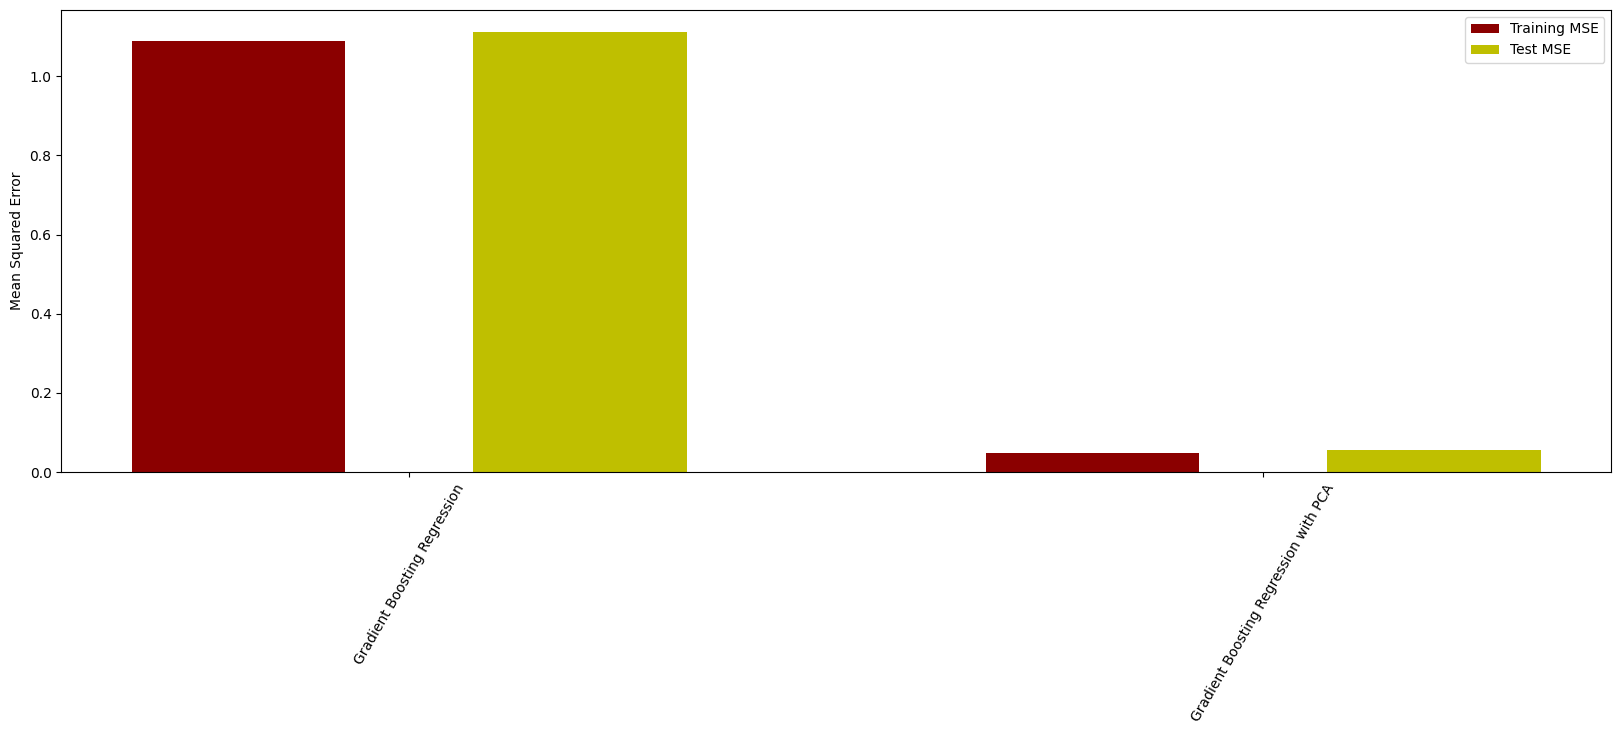

In [49]:
keys = [key for key in kernal_evals2.keys()]
values = [value for value in kernal_evals2.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training MSE", "Test MSE"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=60)
plt.show()

R^2 Score

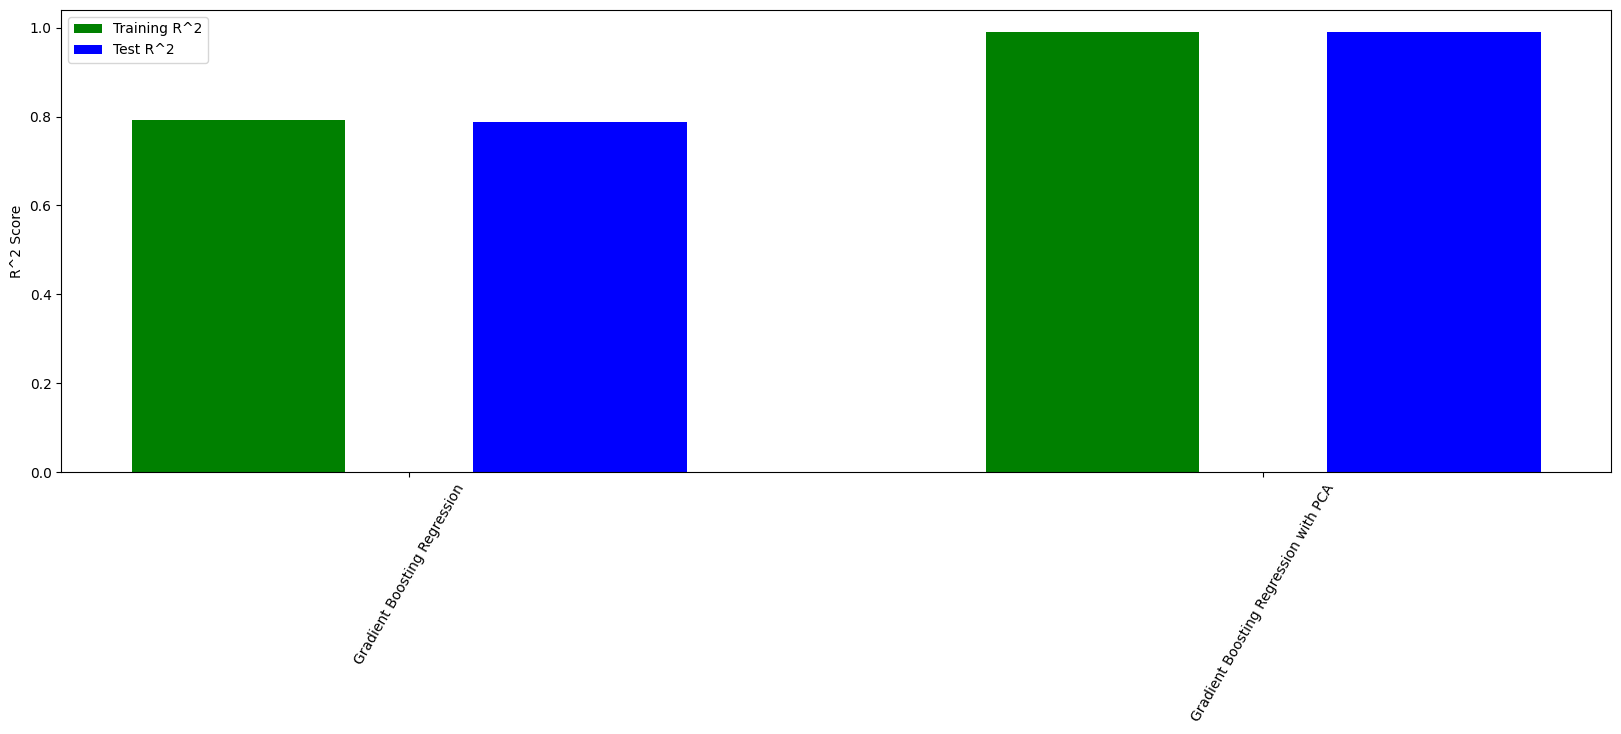

In [50]:
keys = [key for key in kernal_evals2.keys()]
values = [value for value in kernal_evals2.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training R^2", "Test R^2"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("R^2 Score")
plt.xticks(rotation=60)
plt.show()

Variance

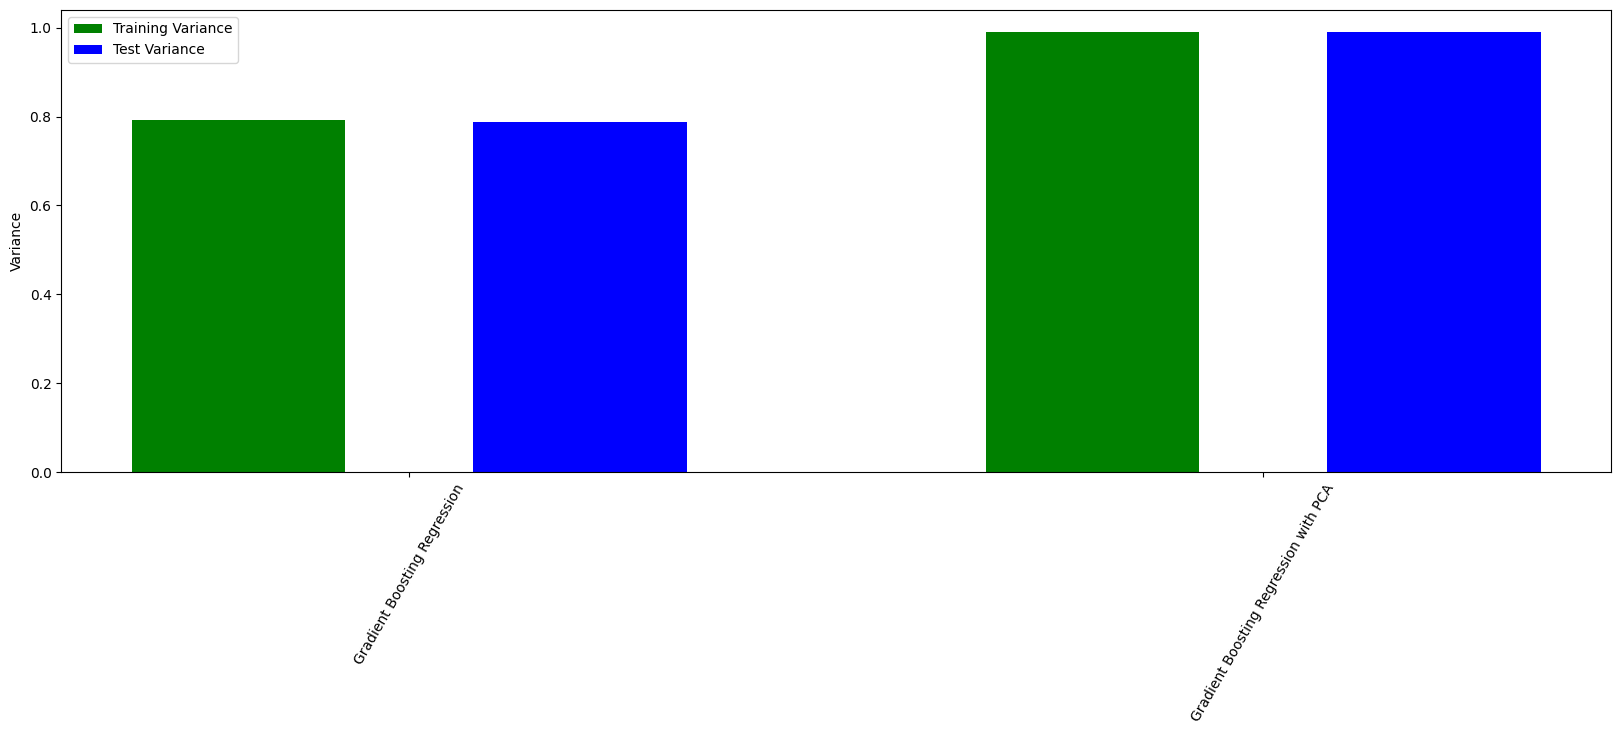

In [51]:
keys = [key for key in kernal_evals2.keys()]
values = [value for value in kernal_evals2.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[4] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[5] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Variance", "Test Variance"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Variance")
plt.xticks(rotation=60)
plt.show()

# Level Columns (Using PCA Analysis Columns)

Note: X ==> Columns Selected by PCA  and Y ==> Level Column

Linear Regression  (Thread Level)

In [48]:
from sklearn.linear_model import Ridge

ridge_reg2 = Ridge(alpha=1.0).fit(X_train_reg2, y_train_reg2)
train_preds, test_preds = evaluate_regression(ridge_reg2, "Ridge with PCA", X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2)

Training Mean Squared Error Ridge Regression with PCA: 0.0000
Test Mean Squared Error Ridge Regression with PCA: 0.0001
Training R^2 Score Ridge Regression with PCA: 1.0000
Test R^2 Score Ridge Regression with PCA: 1.0000
Training Explained Variance Ridge Regression with PCA: 1.0000
Test Explained Variance Ridge Regression with PCA: 1.0000


In [49]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge

# Creating a pipeline with standard scaling, PCA, and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standard scaling
    ('pca', PCA(n_components= 14)),  # PCA
    ('ridge', Ridge(alpha=1.0))  # Ridge Regression
])

# Fit the pipeline on the training data
pipeline.fit(X_train_reg2, y_train_reg2)

# Evaluate the model
train_preds, test_preds = evaluate_regression(pipeline, "Ridge with PCA with best params", X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2)

Training Mean Squared Error Ridge Regression with PCA: 0.9729
Test Mean Squared Error Ridge Regression with PCA: 1.0171
Training R^2 Score Ridge Regression with PCA: 0.8146
Test R^2 Score Ridge Regression with PCA: 0.8069
Training Explained Variance Ridge Regression with PCA: 0.8146
Test Explained Variance Ridge Regression with PCA: 0.8069


KNN  (Thread Level)

In [51]:
from sklearn.neighbors import KNeighborsRegressor

knn2 = KNeighborsRegressor(n_neighbors=5).fit(X_train_reg2, y_train_reg2)
train_preds_bayes, test_preds_bayes = evaluate_regression(knn2, "KNN with PCA", X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2)

Training Mean Squared Error KNN Regression with PCA: 0.1688
Test Mean Squared Error KNN Regression with PCA: 0.2669
Training R^2 Score KNN Regression with PCA: 0.9678
Test R^2 Score KNN Regression with PCA: 0.9493
Training Explained Variance KNN Regression with PCA: 0.9679
Test Explained Variance KNN Regression with PCA: 0.9494


Handle Overfitting

In [52]:
knn2 = KNeighborsRegressor(n_neighbors=10).fit(X_train_reg2, y_train_reg2)
train_preds_bayes, test_preds_bayes = evaluate_regression(knn2, "KNN with PCA with best params", X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2)

Training Mean Squared Error KNN Regression with PCA best params: 0.2416
Test Mean Squared Error KNN Regression with PCA best params: 0.3144
Training R^2 Score KNN Regression with PCA best params: 0.9540
Test R^2 Score KNN Regression with PCA best params: 0.9403
Training Explained Variance KNN Regression with PCA best params: 0.9540
Test Explained Variance KNN Regression with PCA best params: 0.9404


Naiive Bayes (Thread Level)

In [53]:
naivebt2 = GaussianNB().fit(X_train_reg2, y_train_reg2)
train_preds, test_preds = evaluate_regression(naivebt2, "NB with PCA", X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2)

Training Mean Squared Error Naiive Bayes with PCA: 6.5415
Test Mean Squared Error Naiive Bayes with PCA: 6.4388
Training R^2 Score Naiive Bayes with PCA: -0.2468
Test R^2 Score Naiive Bayes with PCA: -0.2221
Training Explained Variance Naiive Bayes with PCA: -0.2467
Test Explained Variance Naiive Bayes with PCA: -0.2220


Support Vector Machine  (Thread Level)

In [54]:
from sklearn.svm import SVR
svr2 = SVR(kernel='rbf').fit(X_train_reg2, y_train_reg2)
train_preds_gnb_best, test_preds_gnb_best = evaluate_regression(svr2, "SVR with PCA", X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2)

Training Mean Squared Error SVR with PCA: 6.6660
Test Mean Squared Error SVR with PCA: 6.7647
Training R^2 Score SVR with PCA: -0.2706
Test R^2 Score SVR with PCA: -0.2839
Training Explained Variance SVR with PCA: 0.0332
Test Explained Variance SVR with PCA: 0.0274


Decision Tree (Thread Level)

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt2 = DecisionTreeRegressor(random_state=42).fit(X_train_reg2, y_train_reg2)
train_preds_gnb_best, test_preds_gnb_best = evaluate_regression(dt2, "DT with PCA", X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2)

Training Mean Squared Error DT with PCA: 0.0000
Test Mean Squared Error DT with PCA: 0.0304
Training R^2 Score DT with PCA: 1.0000
Test R^2 Score DT with PCA: 0.9942
Training Explained Variance DT with PCA: 1.0000
Test Explained Variance DT with PCA: 0.9942


Handle Overfitting

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# Initialize the DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)

# Fit the random search model
random_search.fit(X_train_reg2, y_train_reg2)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Decision Tree Regressor with the best parameters
dt_best = DecisionTreeRegressor(**best_params, random_state=42)
dt_best.fit(X_train_reg2, y_train_reg2)

# Evaluate the model
train_preds_best, test_preds_best = evaluate_regression(dt_best, "DT with PCA with best params", X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3}
Training Mean Squared Error DT with PCA with best params: 0.0004
Test Mean Squared Error DT with PCA with best params: 0.0297
Training R^2 Score DT with PCA with best params: 0.9999
Test R^2 Score DT with PCA with best params: 0.9944
Training Explained Variance DT with PCA with best params: 0.9999
Test Explained Variance DT with PCA with best params: 0.9944


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid
param_dist = {
    'max_depth': [10, 15, 20, 25],
    'min_samples_split': [3, 5, 10],
    'min_samples_leaf': [2, 3, 5],
}

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt, param_distributions=param_dist, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train_reg2, y_train_reg2)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Train the Decision Tree with the best parameters
dt_best = DecisionTreeRegressor(**best_params, random_state=42)
dt_best.fit(X_train_reg2, y_train_reg2)

# Evaluate the model
train_preds_gnb_best, test_preds_gnb_best = evaluate_regression(dt_best, "DT with PCA with best params 2", X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 20}
Training Mean Squared Error DT with PCA with best params 2: 0.0027
Test Mean Squared Error DT with PCA with best params 2: 0.0285
Training R^2 Score DT with PCA with best params 2: 0.9995
Test R^2 Score DT with PCA with best params 2: 0.9946
Training Explained Variance DT with PCA with best params 2: 0.9995
Test Explained Variance DT with PCA with best params 2: 0.9946


Random Forest  (Thread Level)

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor(random_state=42).fit(X_train_reg2, y_train_reg2)
train_preds_best, test_preds_best = evaluate_regression(rf2, "RF with PCA", X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2)

Training Mean Squared Error RF with PCA: 0.0020
Test Mean Squared Error RF with PCA: 0.0159
Training R^2 Score RF with PCA: 0.9996
Test R^2 Score RF with PCA: 0.9970
Training Explained Variance RF with PCA: 0.9996
Test Explained Variance RF with PCA: 0.9970


XGBoost (Thread Level)

In [54]:
import xgboost as xgb
xgb_reg2 = xgb.XGBRegressor(eval_metric='rmse', random_state=42).fit(X_train_reg2, y_train_reg2)
train_preds, test_preds = evaluate_regression(xgb_reg2, "XGB with PCA", X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2)

Training Mean Squared Error XGB with PCA: 0.0030
Test Mean Squared Error XGB with PCA: 0.0144
Training R^2 Score XGB with PCA: 0.9994
Test R^2 Score XGB with PCA: 0.9973
Training Explained Variance XGB with PCA: 0.9994
Test Explained Variance XGB with PCA: 0.9973


Gradient Boosting (Thread Level)

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

gb2 = GradientBoostingRegressor(random_state=42).fit(X_train_reg2, y_train_reg2)
train_preds, test_preds = evaluate_regression(gb2, "GB with PCA", X_train_reg2, X_test_reg2, y_train_reg2, y_test_reg2)

Training Mean Squared Error GB with PCA: 0.0490
Test Mean Squared Error GB with PCA: 0.0558
Training R^2 Score GB with PCA: 0.9907
Test R^2 Score GB with PCA: 0.9894
Training Explained Variance GB with PCA: 0.9907
Test Explained Variance GB with PCA: 0.9894


# Comparison Between Model (With PCA Analysis) Thread Level

Mean Squared Error

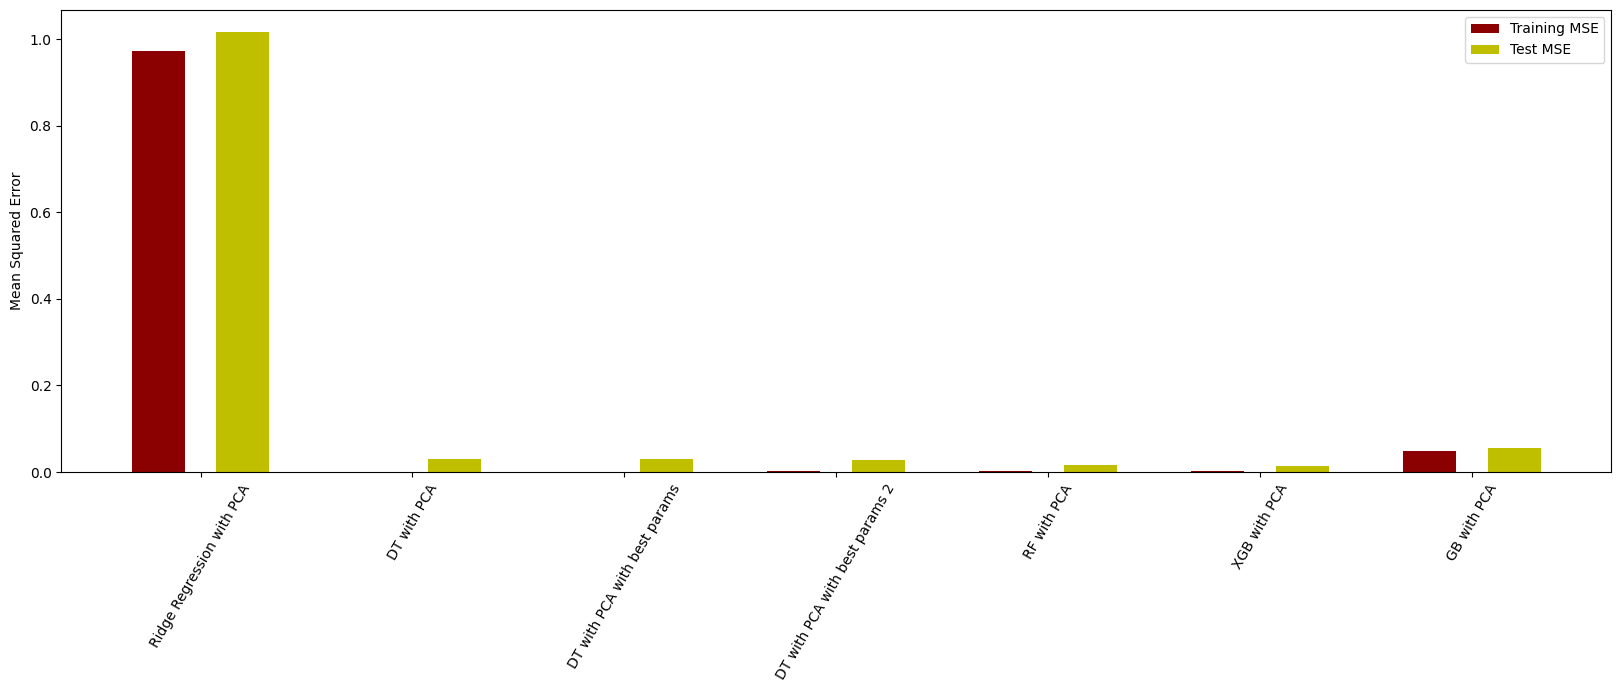

In [57]:
keys = [key for key in kernal_evals2.keys()]
values = [value for value in kernal_evals2.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training MSE", "Test MSE"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Mean Squared Error")
plt.xticks(rotation=60)
plt.show()

R^2 Score

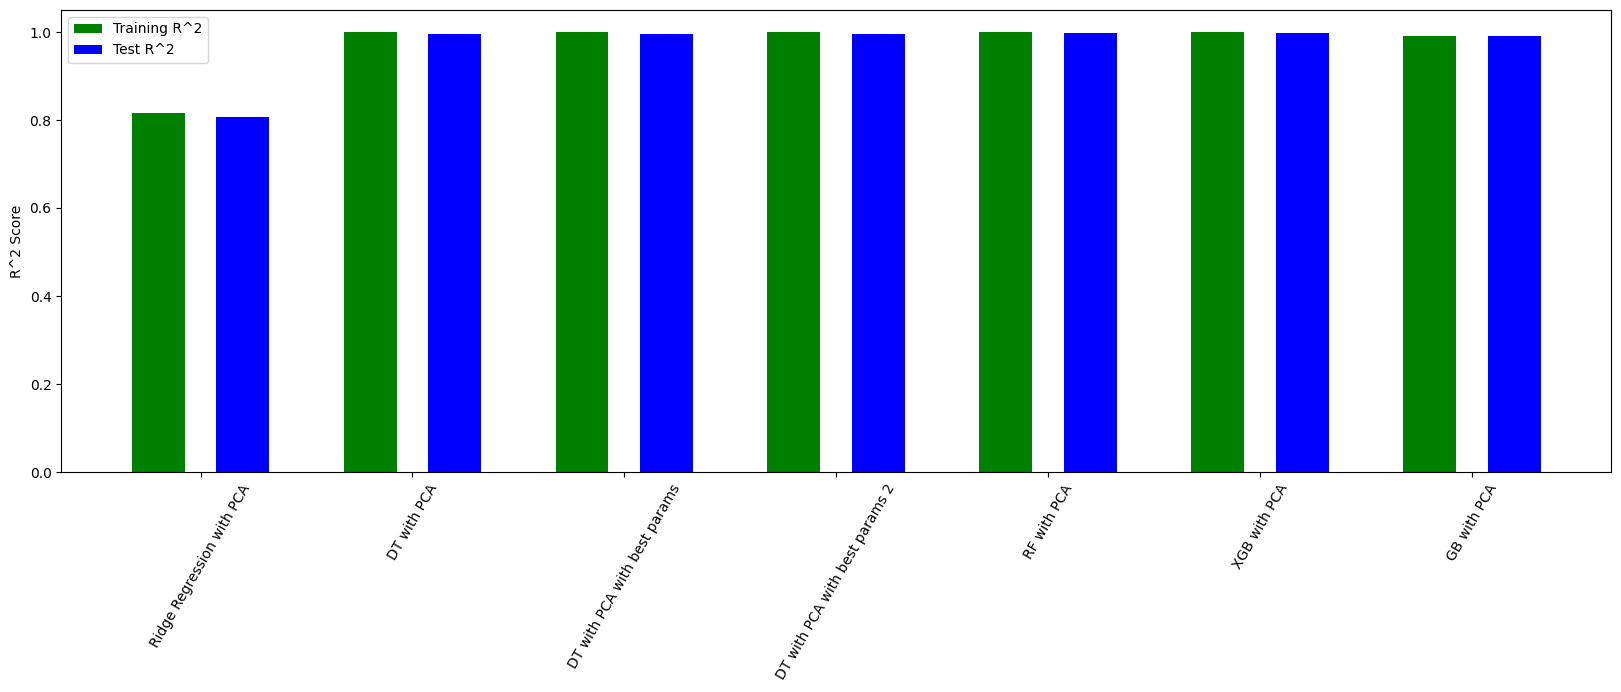

In [58]:
keys = [key for key in kernal_evals2.keys()]
values = [value for value in kernal_evals2.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training R^2", "Test R^2"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("R^2 Score")
plt.xticks(rotation=60)
plt.show()

Variance

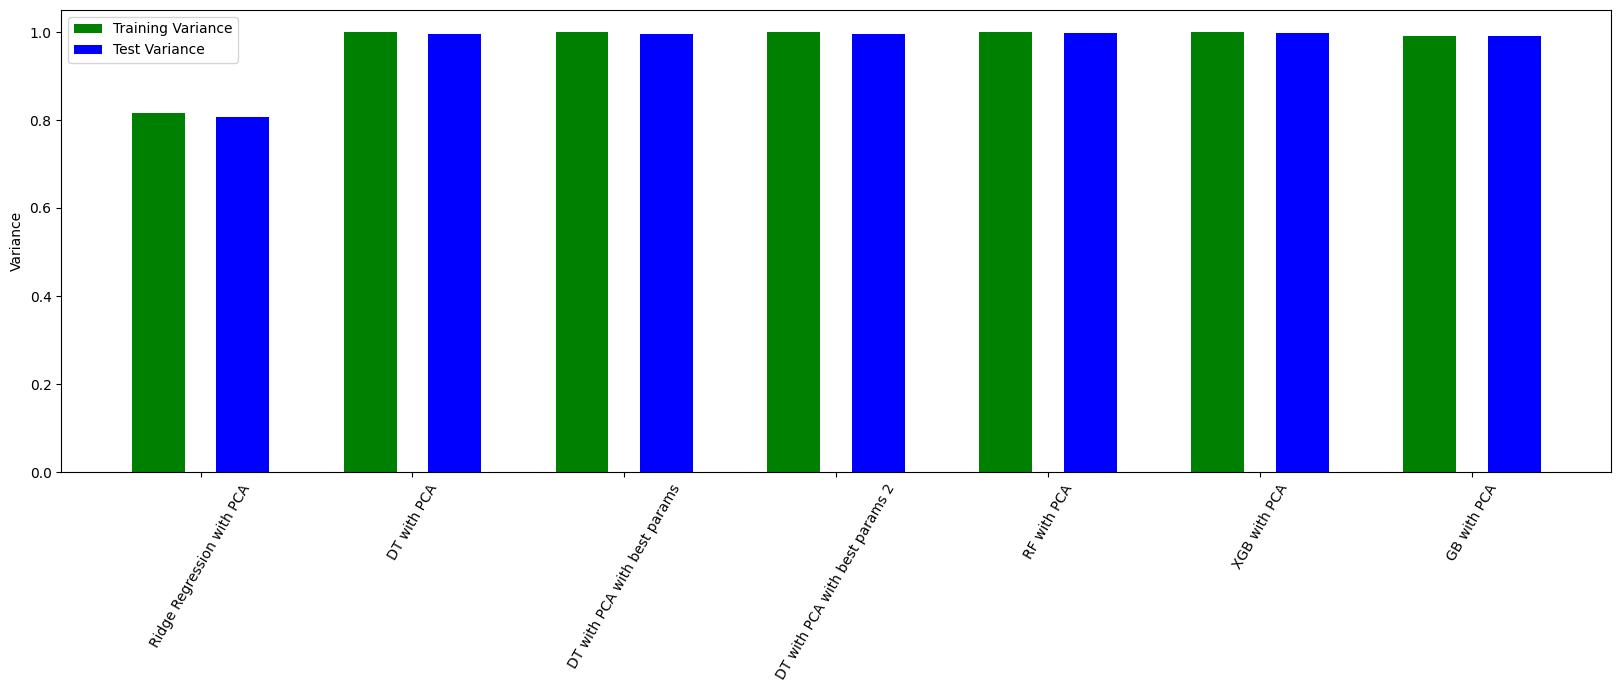

In [59]:
keys = [key for key in kernal_evals2.keys()]
values = [value for value in kernal_evals2.values()]
fig, ax = plt.subplots(figsize=(20, 6))
ax.bar(np.arange(len(keys)) - 0.2, [value[4] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[5] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Variance", "Test Variance"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Variance")
plt.xticks(rotation=60)
plt.show()

Save Model

In [60]:
import joblib

In [61]:
joblib.dump(dt2, 'intrusion_detection_model.pkl')

['intrusion_detection_model.pkl']

AutoKeras

In [ ]:
import pandas as pd
import autokeras as ak
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
import numpy as np

# Read your dataset
data_train = pd.read_csv("./NSL-KDD/KDDTrain+.txt")

# Define columns
columns = (['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'outcome', 'level'])

# Assign column names
data_train.columns = columns

# Mapping outcome column to binary classes
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 0
data_train.loc[data_train['outcome'] != 0, "outcome"] = 1

# Get categorical columns for encoding
cat_cols = ['protocol_type', 'service', 'flag']

# Label encode categorical columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data_train[col] = le.fit_transform(data_train[col])
    label_encoders[col] = le

# Separate features and target variable
X = data_train.drop(['level', 'outcome'], axis=1)
y = data_train['outcome'].astype(int)  # Ensure y is integer type

# Scaling the numeric features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize AutoKeras StructuredDataClassifier
clf = ak.StructuredDataClassifier(max_trials=10, overwrite=True)

# Fit the AutoKeras StructuredDataClassifier
clf.fit(X_train, y_train, epochs=10)

# Evaluate the classifier
score = clf.evaluate(X_test, y_test)
print("Test Accuracy:", score)

# Get the best model
best_model = clf.export_model()
print(best_model.summary())